# MSIN0166: Data Engineering
________________________
# Sentiment Analysis on Google Gemini posts across Reddit, Twitter and News Sources
________________________

## Group - 6

### Word Count -  (Excluding table of contents and appendix)

### Team Members:
1. **Aayush Ladda**  
  Student ID      : 23177829  
  Candidate Number: DNMF6
2. **Ankit Mehani**  
  Student ID      : 23110833  
  Candidate Number: FYWN5
3. **Pakteera Ariyasantichai**  
  Student ID      : 20021734  
  Candidate Number: DRKT0
4. **Zuzanna Swidecka**  
  Student ID      : 19110937  
  Candidate Number: JLLT9
  
________________________



#### Link for GitHub Repository:

#### Link to Jira:

# Table of Contents:
_________________________________
* [1. Introduction](#Bullet1)
* [2. Data Flow Diagram](#Bullet2)
* [3. Data Extraction](#Bullet3)  
  * [3.1. Reddit](#Bullet3.1)
  * [3.2. NewsAPI and Tweets](#Bullet3.2)
* [4. Data Loading](#Bullet4)  
  * [4.1. Amazon S3](#Bullet4.1)
  * [4.2. MongoDB](#Bullet4.2)
* [5. Data Transformation](#Bullet5)  
  * [5.1. SQLite3](#Bullet5.1)
* [6. Sentiment Analysis](#Bullet6)  
  * [6.1. Word Cloud](#Bullet6.1)  
  * [6.2. Exporting the data as a parquet file](#Bullet6.2)  
* [7. Appendix](#Bullet7)

# 1. Introduction <a class="anchor" id="Bullet1"></a>

This report evaluates Google Gemini's role in digital advertising by synthesizing data from three cloud-based sources, providing a comprehensive sentiment analysis. It starts with a deep dive into Reddit discussions through manual web scraping, offering insights into user perceptions. It then aggregates news content via an API on Amazon EC2 to capture media narratives, and employs synthetic tweets to overcome API limitations, ensuring a broad spectrum of viewpoints. Utilizing cloud technologies like Amazon S3 for storage and MongoDB and SQLite for databases, the foundation for robust data analysis is set.

Leveraging Python for its advanced analytics, the report undertakes sentiment analysis, word cloud visualization, and examines data, offering a nuanced understanding of Google Gemini’s position in the digital sphere. This analysis not only reveals the current sentiment landscape but also provides strategic insights into Google Gemini's market impact, offering valuable intelligence for navigating the digital advertising ecosystem efficiently.

# 2. Data Flow Diagram <a class="anchor" id="Bullet2"></a>

The project is majorly divided into 3 parts:
- Extract
- Load
- Transform  
 
After ELT, we perform the sentiment analysis on the aggregated data from all the sources.  

Following is the Data Flow diagram for the project:  

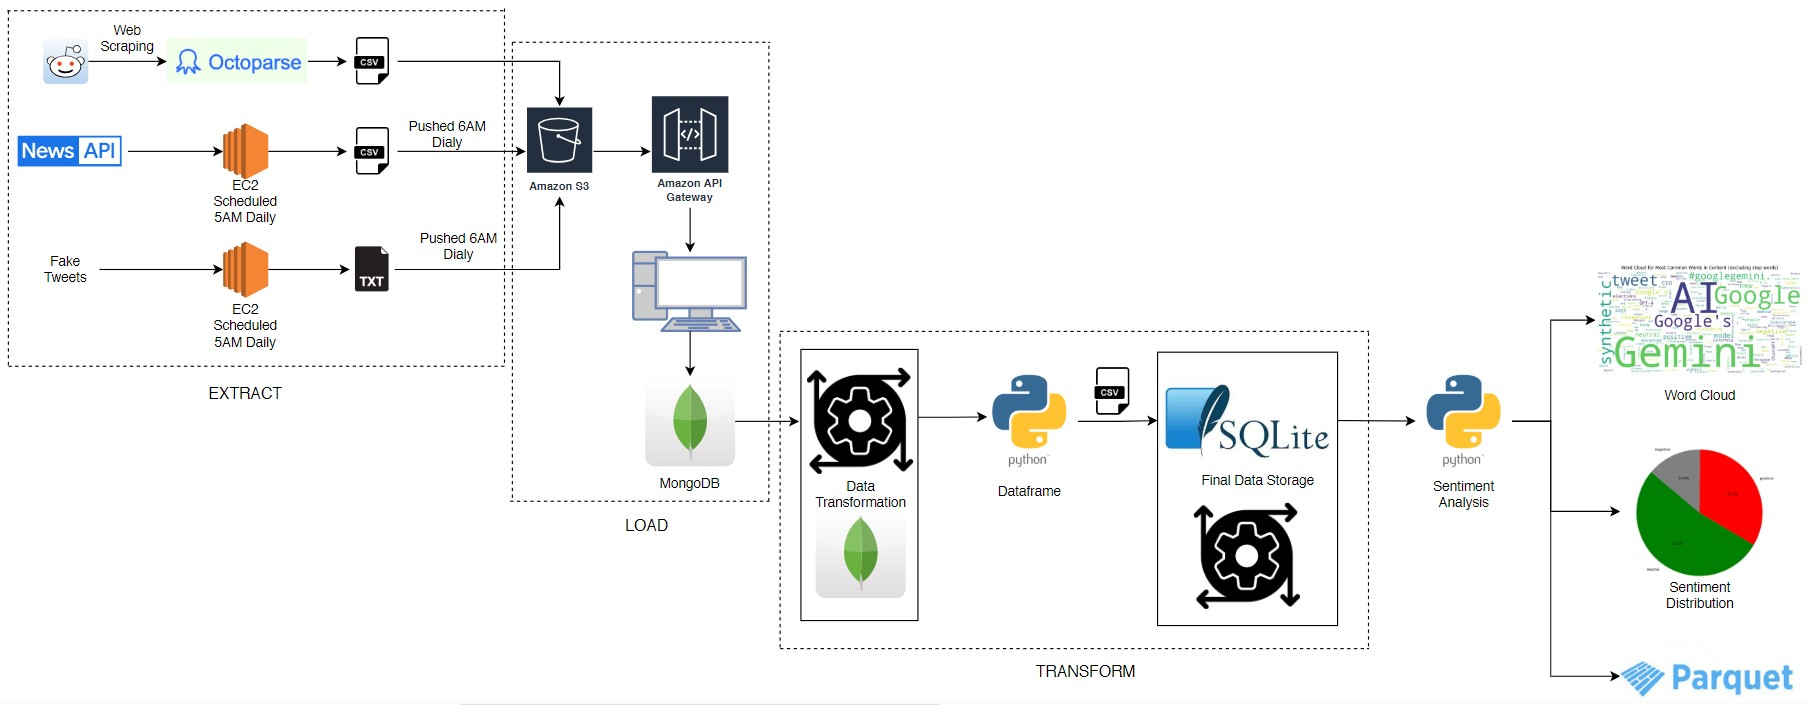

In [1]:
from IPython.display import display, Image
image_path = 'Data_Flow_Diagram.jpg'
display(Image(filename=image_path))

# 3. Data Extraction <a class="anchor" id="Bullet3"></a>

This section details the meticulous approach to extracting data relevant to "Google Gemini" from varied sources such as Reddit, news websites, and simulated social media content. Opting for Octoparse over BeautifulSoup for its advanced web scraping capabilities, the project outlines a structured process for setting up tasks, selecting data elements, and configuring extraction parameters to ensure comprehensive data collection. Concurrently, it utilizes Amazon EC2 to automate the retrieval of news headlines and the generation of simulated tweets, leveraging Python scripts and the newsapi.org API. This automation, facilitated by Crontab, ensures the continuous, daily accumulation of data, forming a rich dataset primed for in-depth analysis through sophisticated extraction techniques and cloud computing.

### 3.1. Reddit  <a class="anchor" id="Bullet3.1"></a>


Web scraping using Octoparse to extract data from Reddit involves the following steps:

1. Setting up the task: Open Octoparse and creating a new task. We specify the URL of the Reddit page we want to scrape and set up the necessary configurations.

2. Configuring the extraction: Use the built-in tools in Octoparse to identify and select the elements on the Reddit page that contain the data we want to extract. This could include posts, comments, usernames, timestamps, and any other relevant information.

3. Defining search parameters: Input the search keyword "Google Gemini" into Octoparse to specify the content you want to extract from Reddit. This ensures that only posts and comments related to "Google Gemini" are captured during the scraping process.

4. Extracting the data: Running the extraction process in Octoparse to scrape the desired data from Reddit. The tool will automatically navigate through the Reddit page, locate the relevant information based on your specifications, and extract it into a structured format such as a CSV file or database.

5. Reviewing and refining the results: After the extraction is complete, review the scraped data to ensure accuracy and completeness.

6. Saving and exporting the data: Once we are satisfied with the extracted data, we export it to the preferred destination for further analysis.

By following these steps, we effectively used Octoparse to scrape data from Reddit based on the search keyword "Google Gemini" for our project.

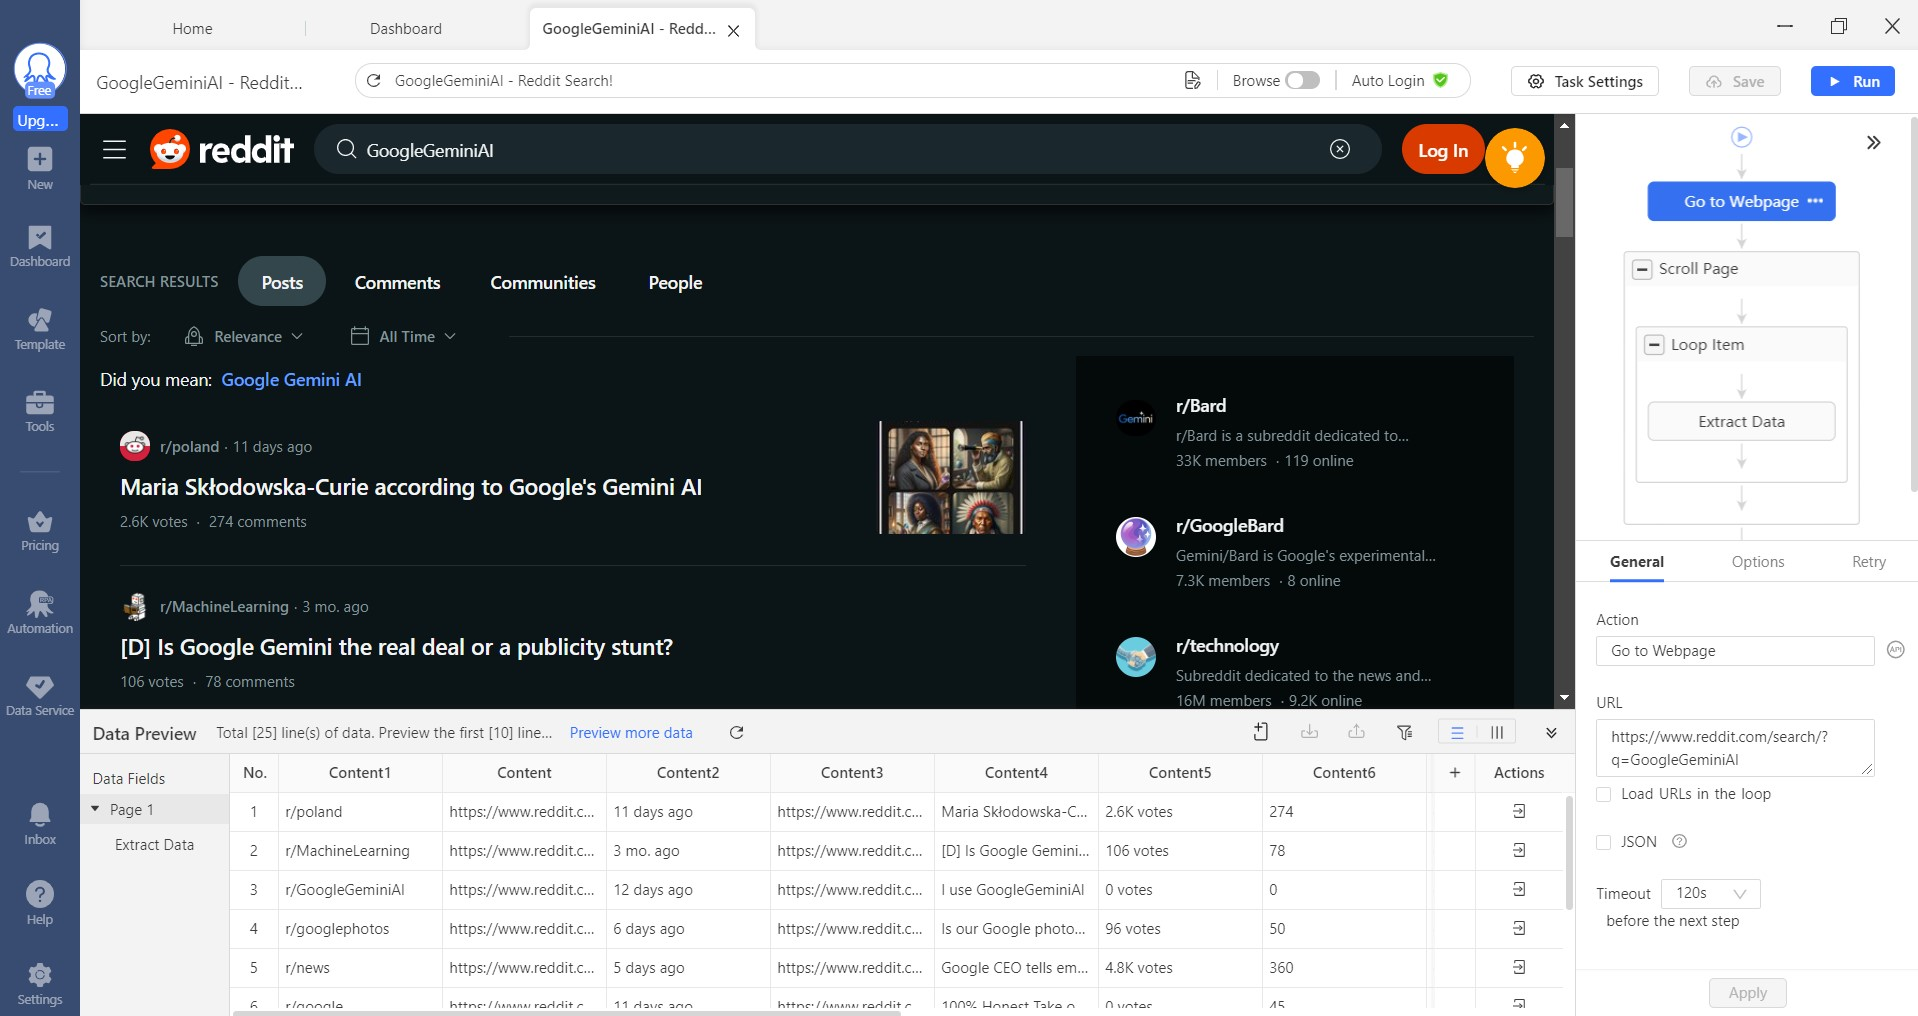

In [2]:
from IPython.display import display, Image
image_path = 'Octoparse.jpg'
display(Image(filename=image_path))

### 3.2. NewsAPI and Tweets  <a class="anchor" id="Bullet3.2"></a>

Here's a detailed step by step explanation of the process of fetching news data from newsapi.org:

- Setting up EC2 Instance: We utilized the Amazon EC2 service from Amazon Web Services to create a virtual computing environment. This EC2 instance serves as the platform where all tasks are executed. We chose EC2 due to its scalability and flexibility, allowing us to easily manage and automate our data retrieval processes.

- Programming Tasks in Python: Within the EC2 instance, we developed Python scripts to handle the tasks of fetching news data from the newsapi.org website and generating fake tweets. These scripts leverage the capabilities of Python libraries and APIs to interact with external services and retrieve data.

- Fetching News Data: Using the newsapi.org API, our Python script retrieves news headlines from various sources. We specifically filter these headlines for instances containing the keyword 'Google Gemini', ensuring that we only capture relevant information. This data retrieval process is scheduled to run automatically every morning at 5 AM using a scheduling tool like Crontab.

- Saving News Headlines: Once the news headlines are fetched, our Python script saves this data as a CSV file within the EC2 instance. This file serves as a structured repository of news headlines related to 'Google Gemini', allowing us to easily access and analyze the information for insights and trends.

- Generating Fake Tweets: We generate 50 fake tweets daily within the EC2 instance. These tweets are categorized as negative, positive, or neutral to simulate a diverse range of sentiments. Each day's batch of fake tweets is appended to an existing TXT file without altering the tweets previously generated. This ensures that the tweet dataset continues to grow over time, capturing a larger volume of fake tweets for analysis.

- Exporting Tweet Data: The generated fake tweets are exported as a TXT file within the EC2 instance. Each day's batch of fake tweets is appended to the existing TXT file, preserving the previously generated tweets. This cumulative TXT file contains a collection of fake tweets that complement the real news headlines, providing additional context and diversity to our dataset.

- Task Scheduling with Crontab: To automate the execution of these tasks at specific times, we utilize Crontab, a time-based job scheduler in Unix-like operating systems. By configuring Crontab with the desired schedule, we ensure that the news data retrieval and tweet generation tasks are executed precisely at 5 AM every morning without manual intervention.

In summary, our process involves leveraging the capabilities of Amazon EC2, Python scripting, newsapi.org API, and tweet generation to systematically retrieve, store, and analyze data related to 'Google Gemini'. The automation provided by EC2 and Crontab ensures that our data retrieval tasks are executed reliably and timely, enabling us to stay updated on developments and insights in the domain of 'Google Gemini'. Additionally, the incremental generation of fake tweets allows us to continuously expand our dataset for more comprehensive analysis.


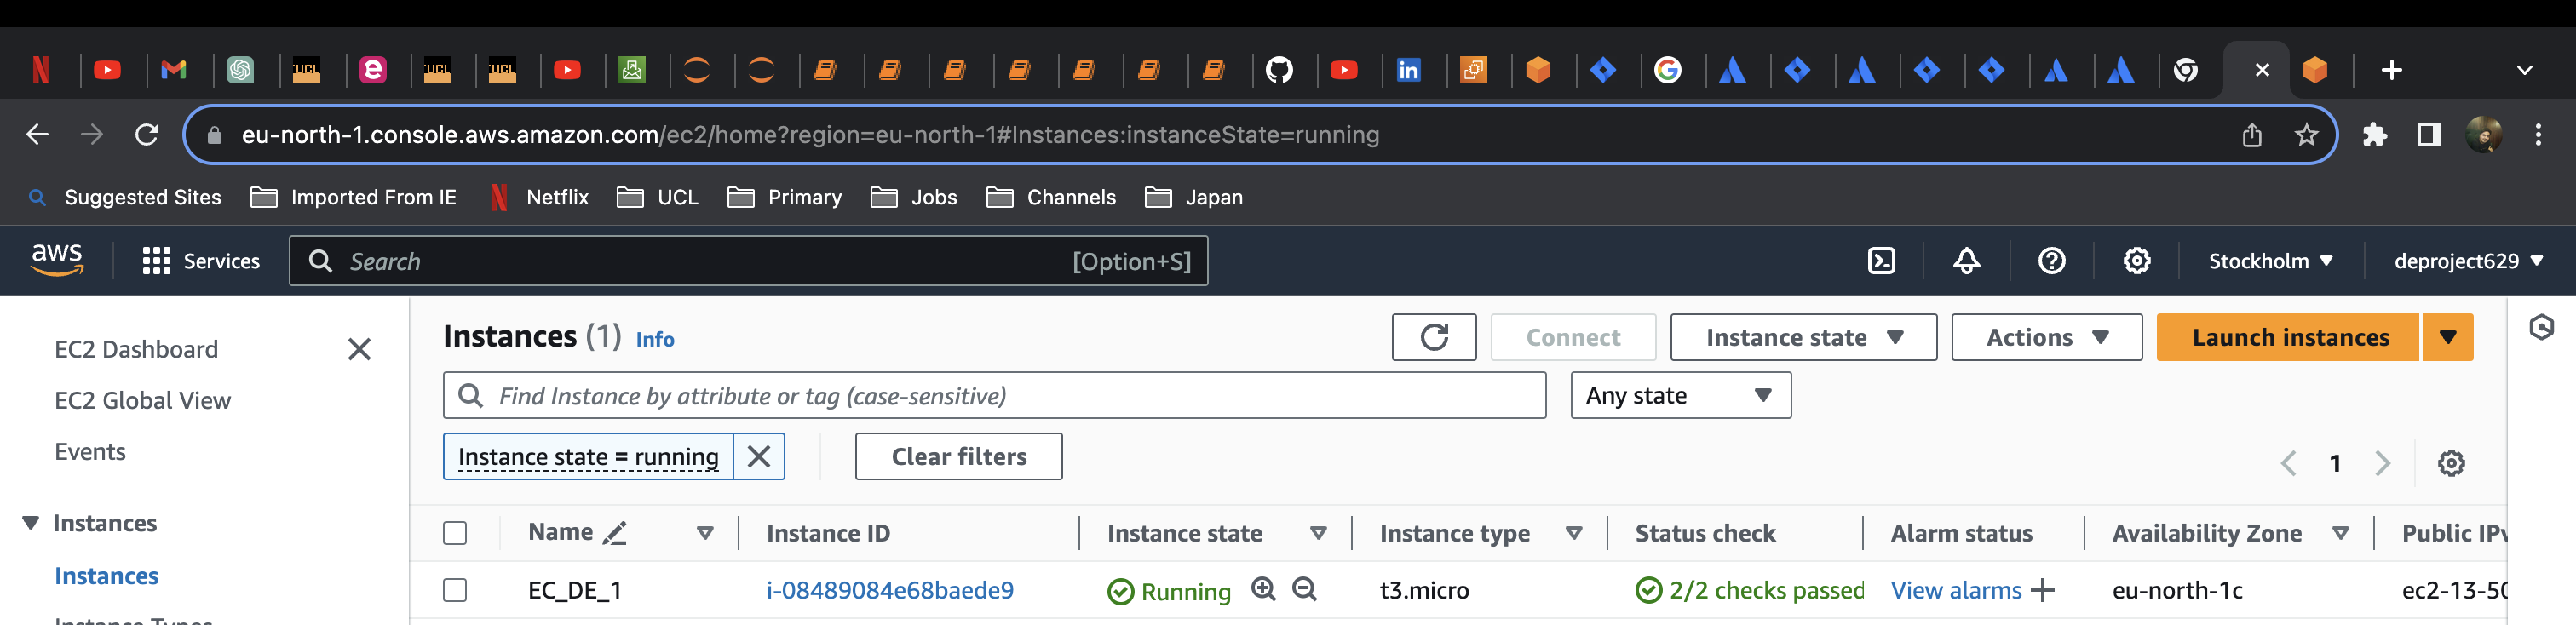

In [3]:
from IPython.display import display, Image
image_path = 'AWS_Screenshots\Screenshot 2024-03-04 at 13.49.40.png'
display(Image(filename=image_path))

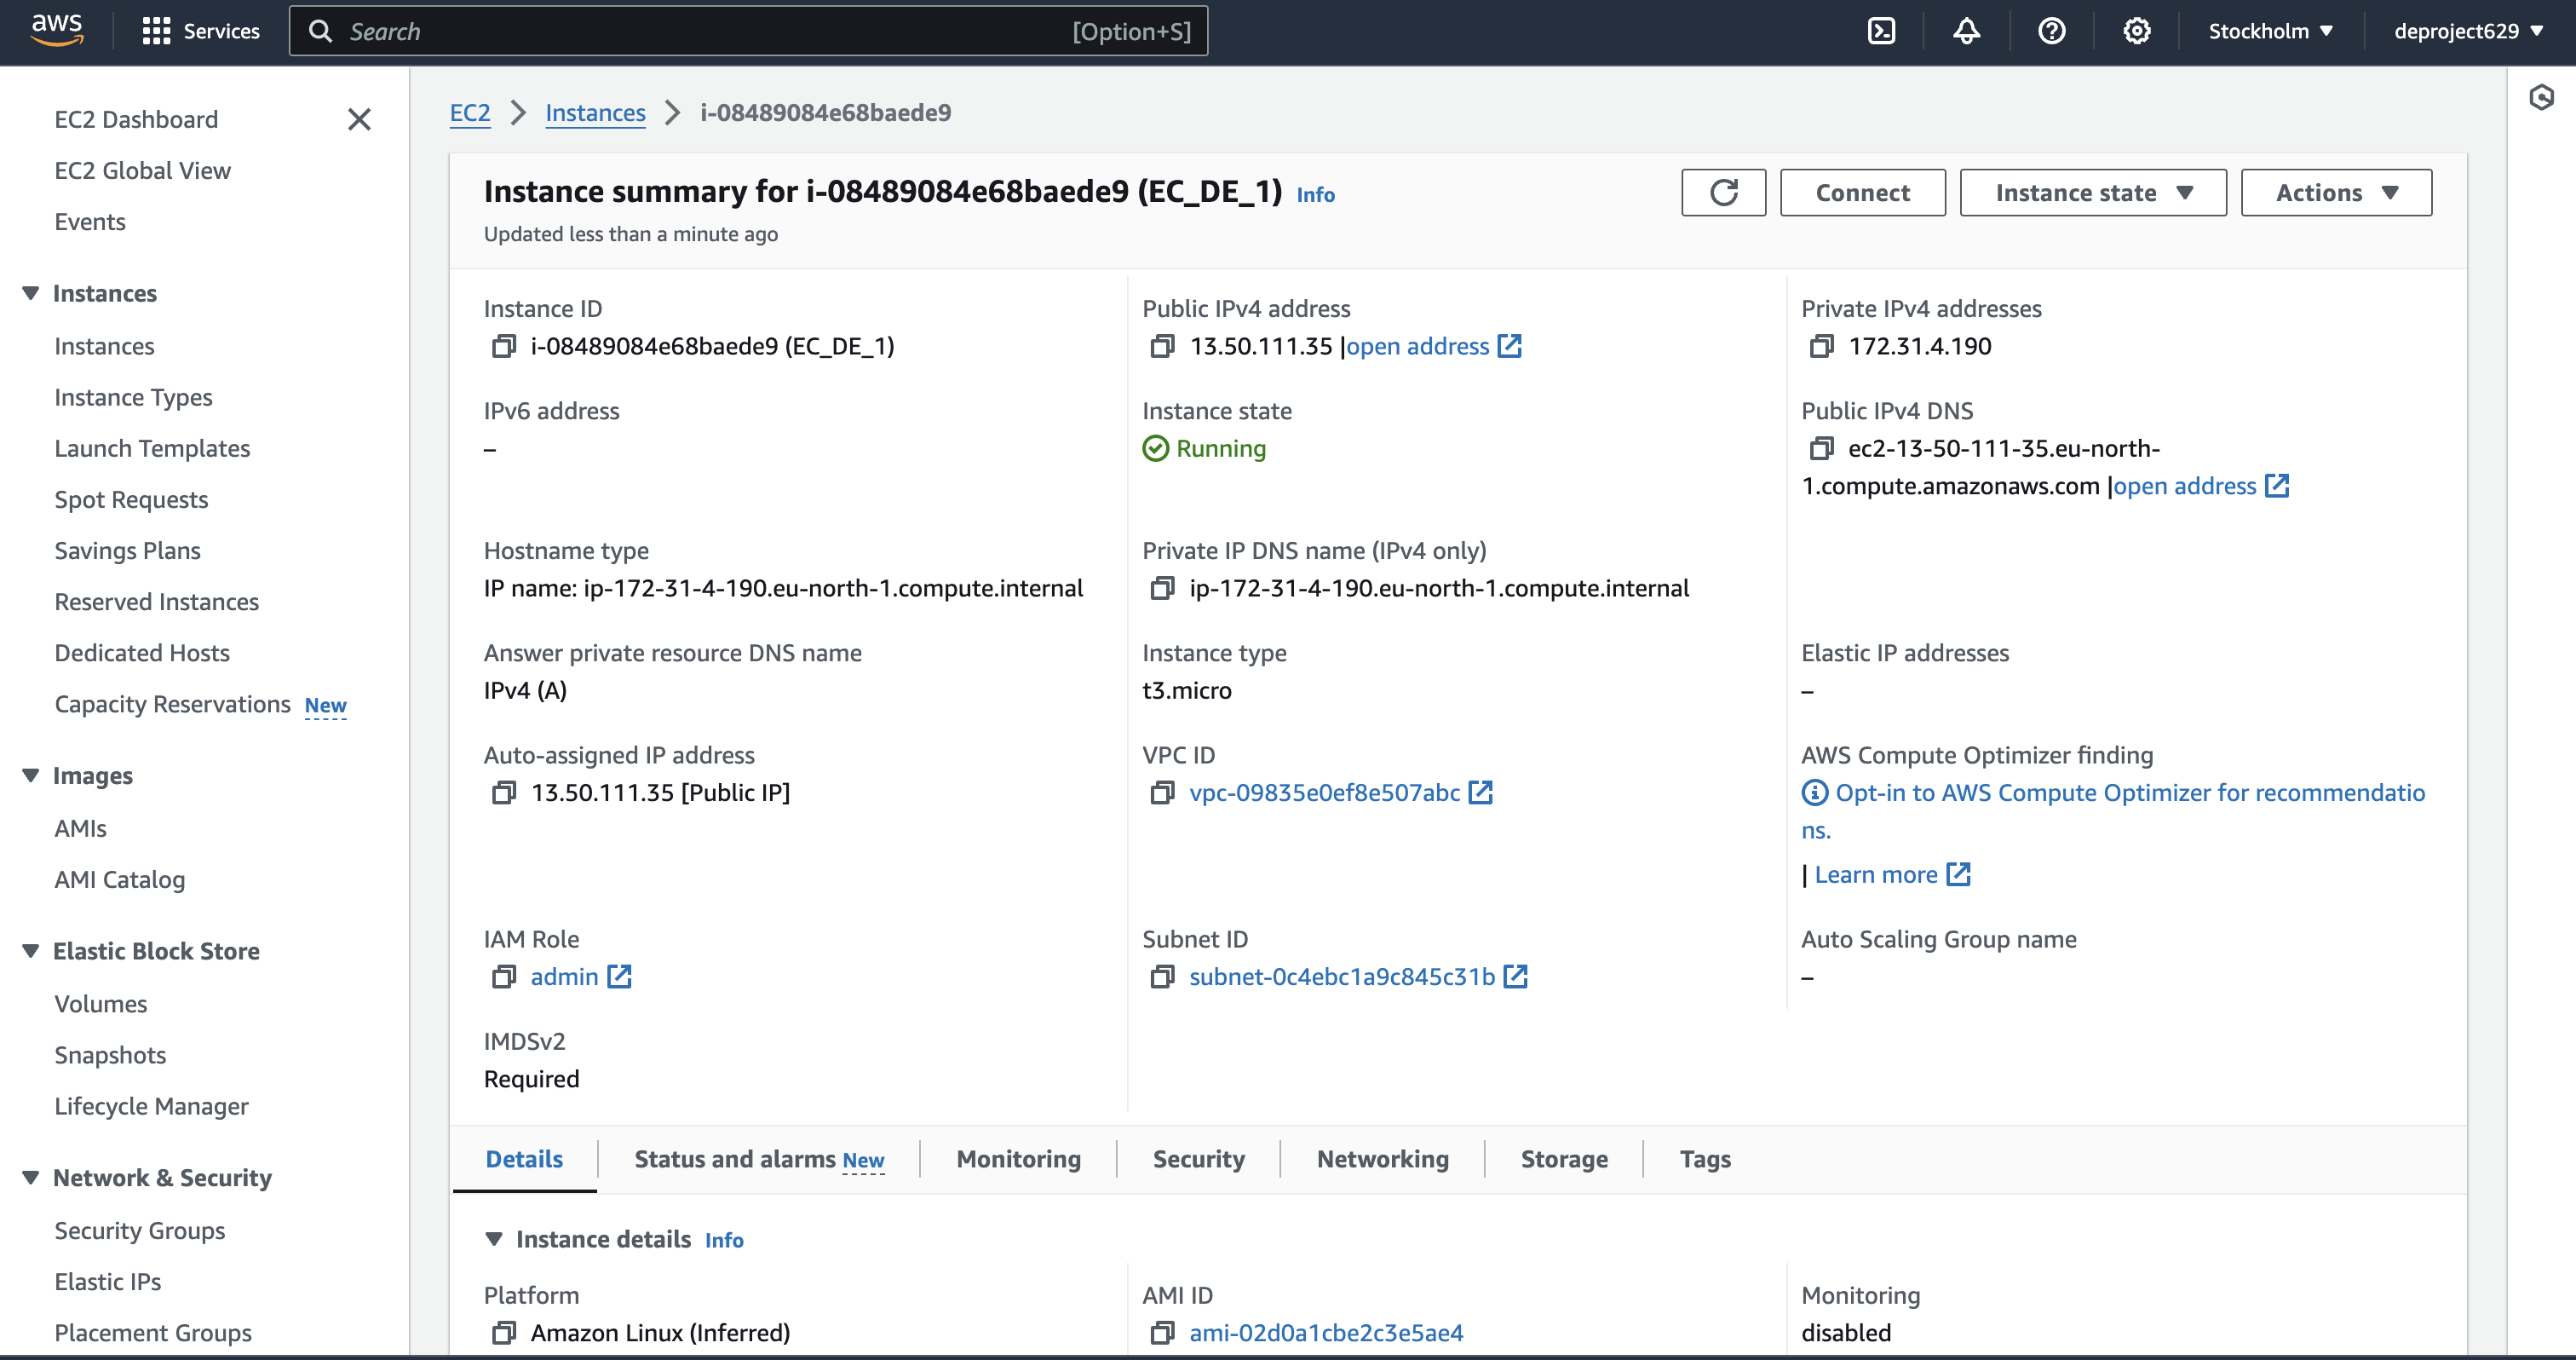

In [4]:
from IPython.display import display, Image
image_path = 'AWS_Screenshots\Screenshot 2024-03-04 at 13.50.21.png'
display(Image(filename=image_path))

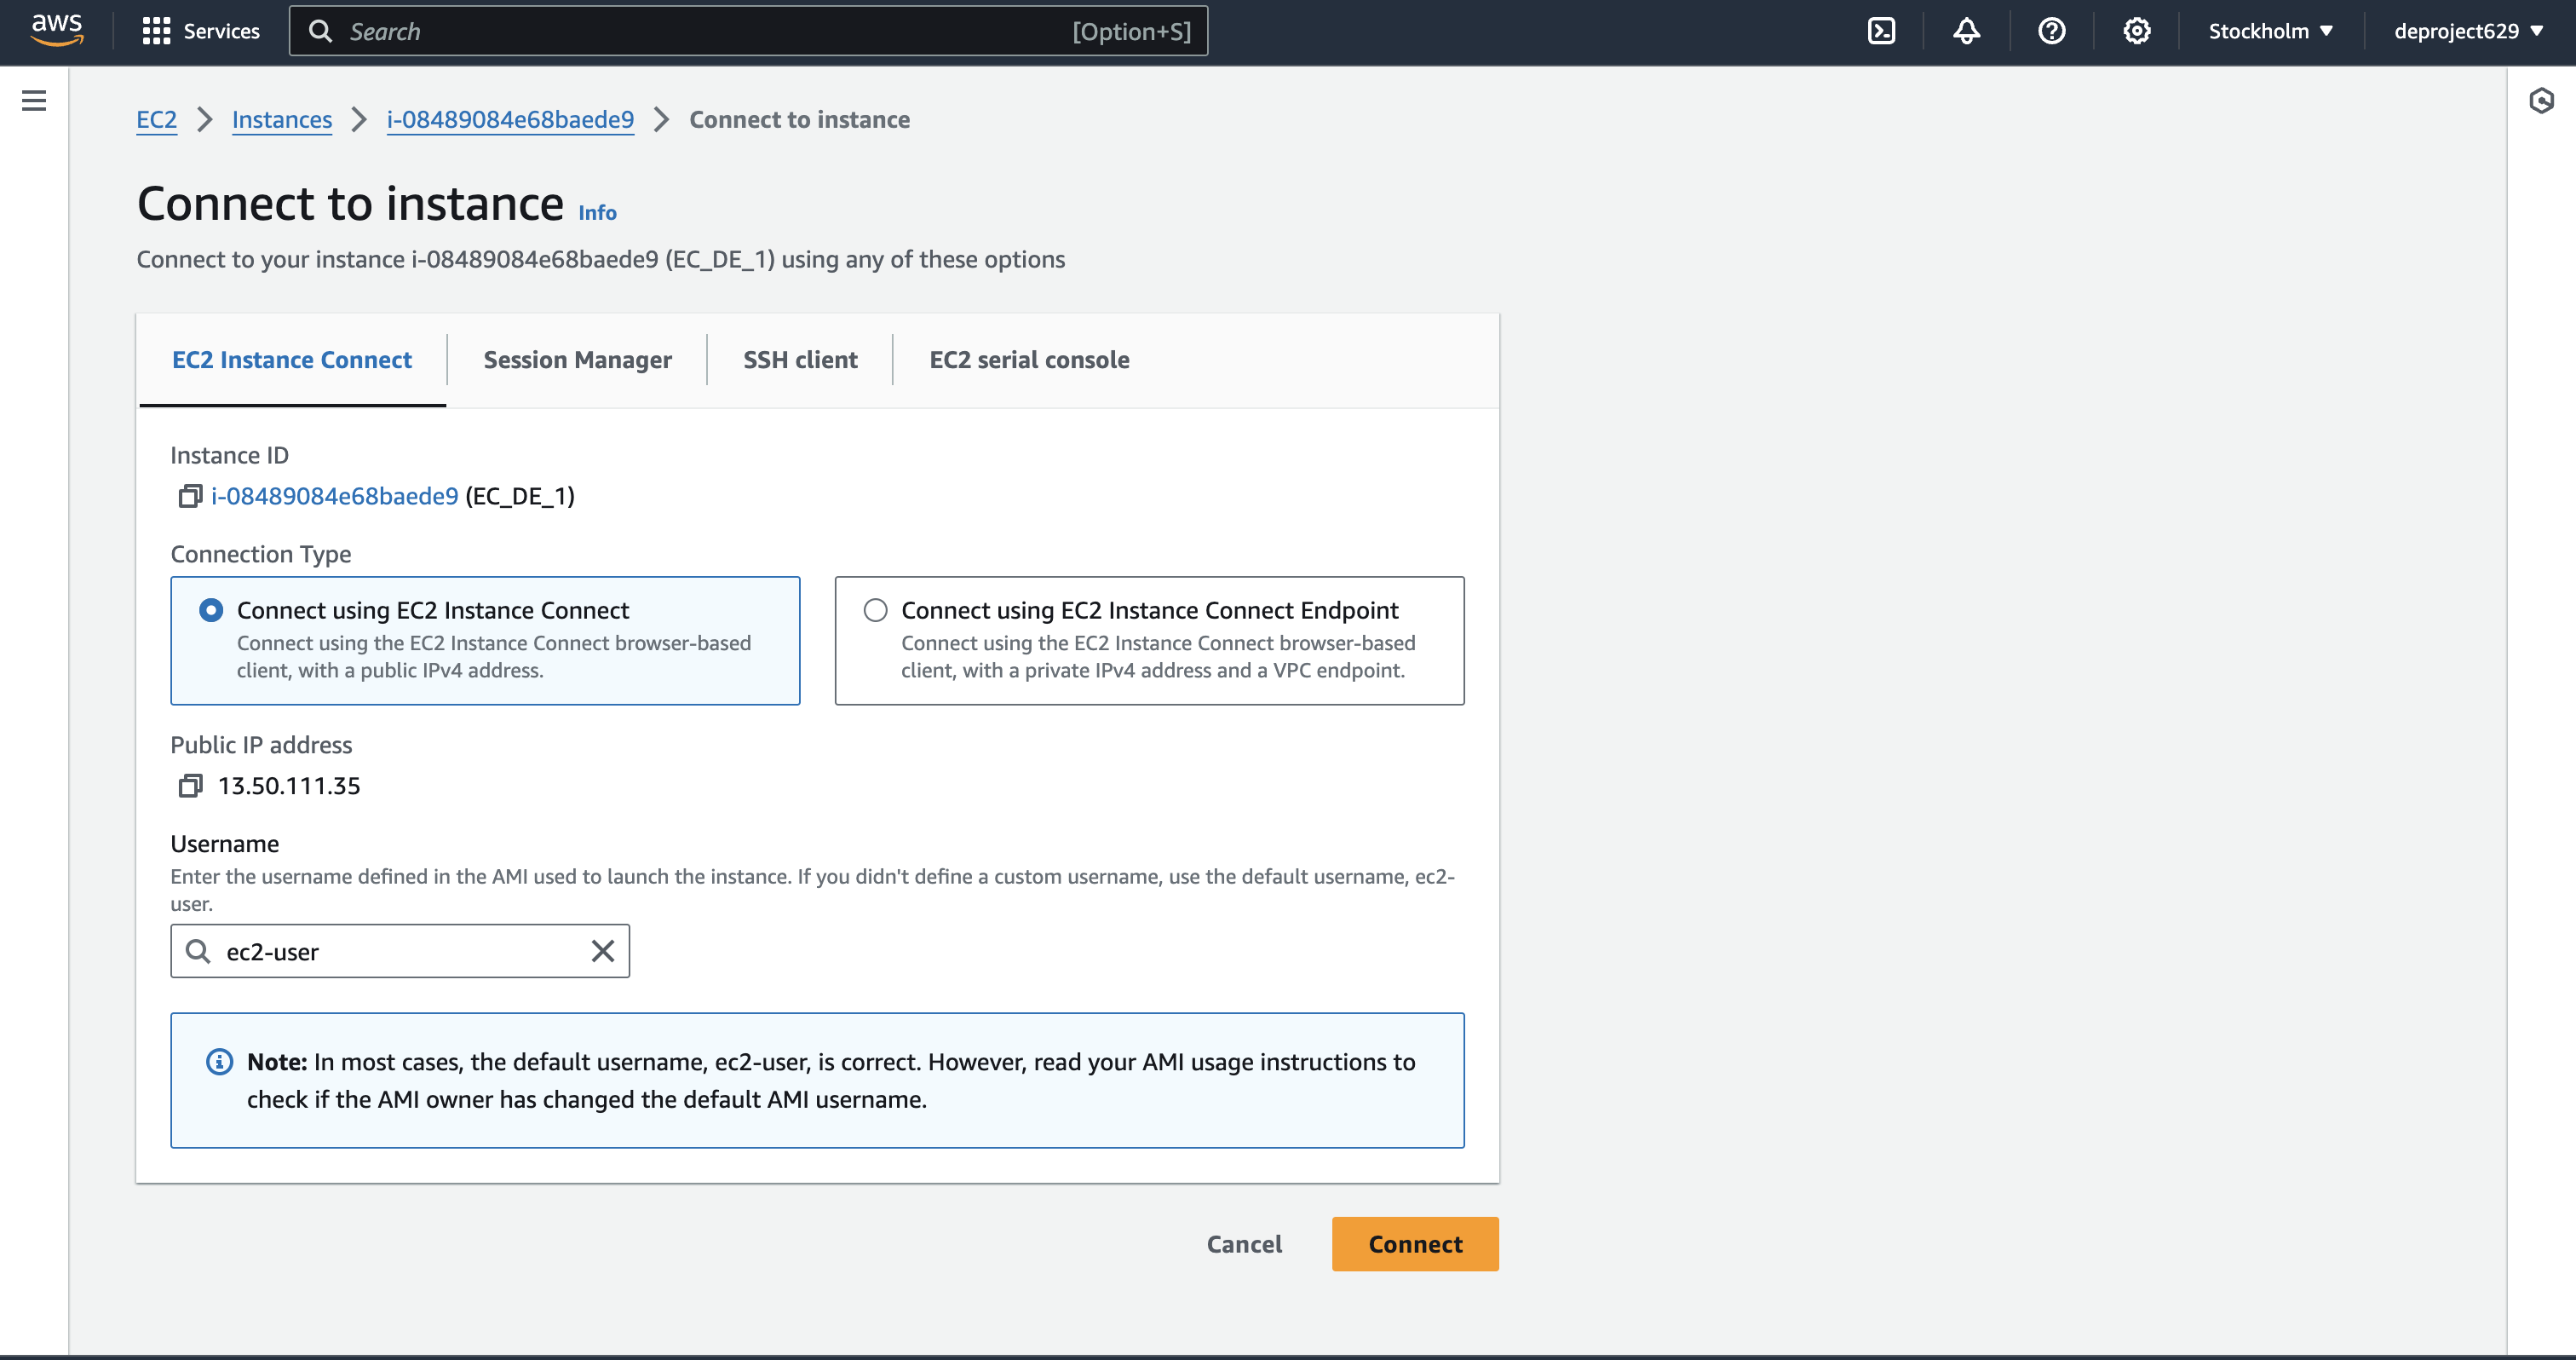

In [5]:
from IPython.display import display, Image
image_path = 'AWS_Screenshots\Screenshot 2024-03-04 at 13.50.29.png'
display(Image(filename=image_path))

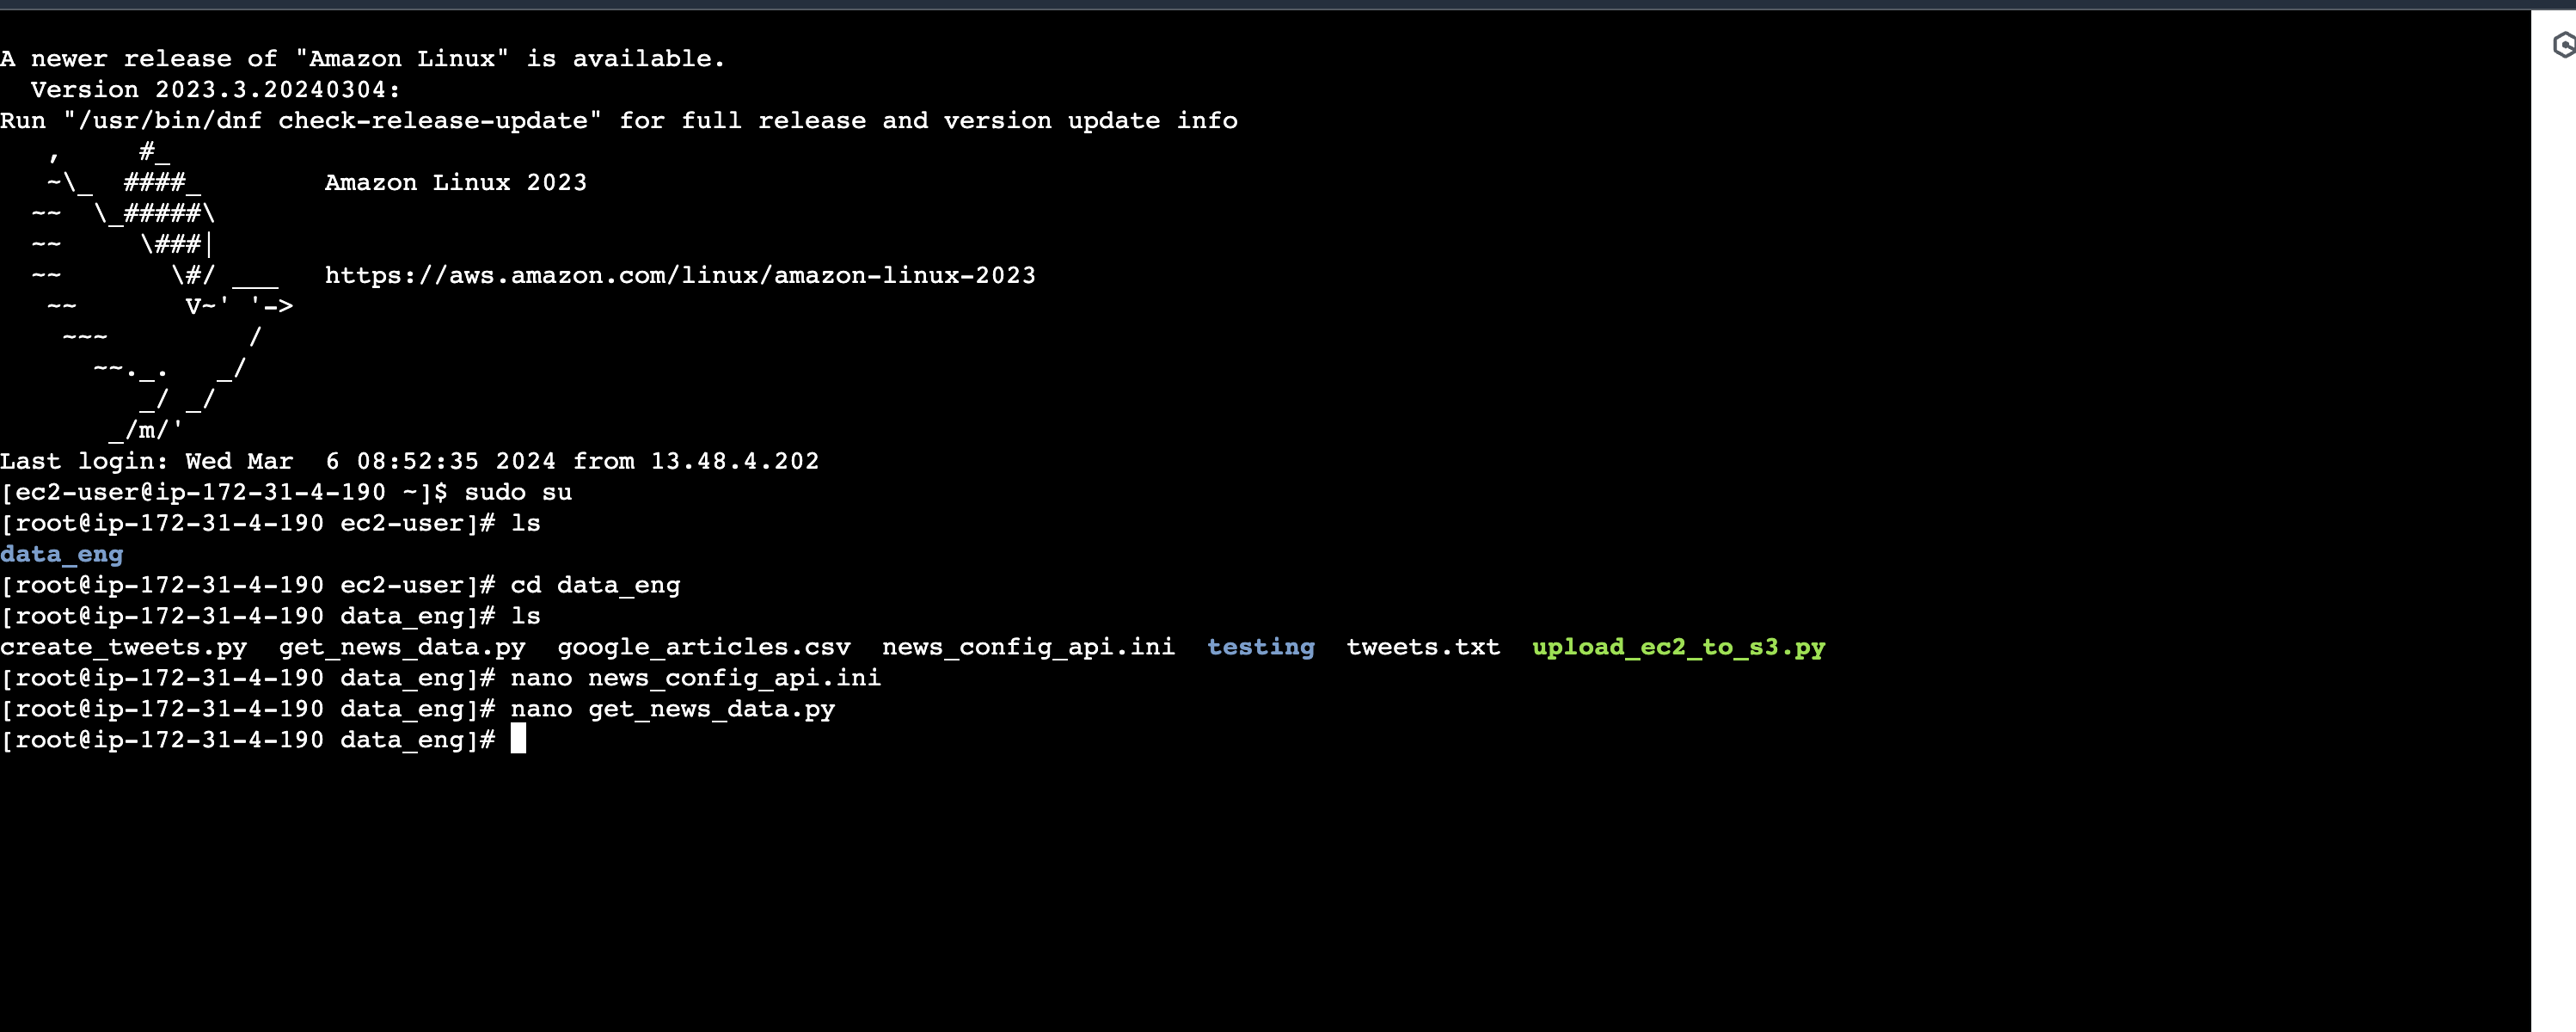

In [55]:
from IPython.display import display, Image
image_path = 'AWS_Screenshots\MicrosoftTeams-image (1).png'
display(Image(filename=image_path))

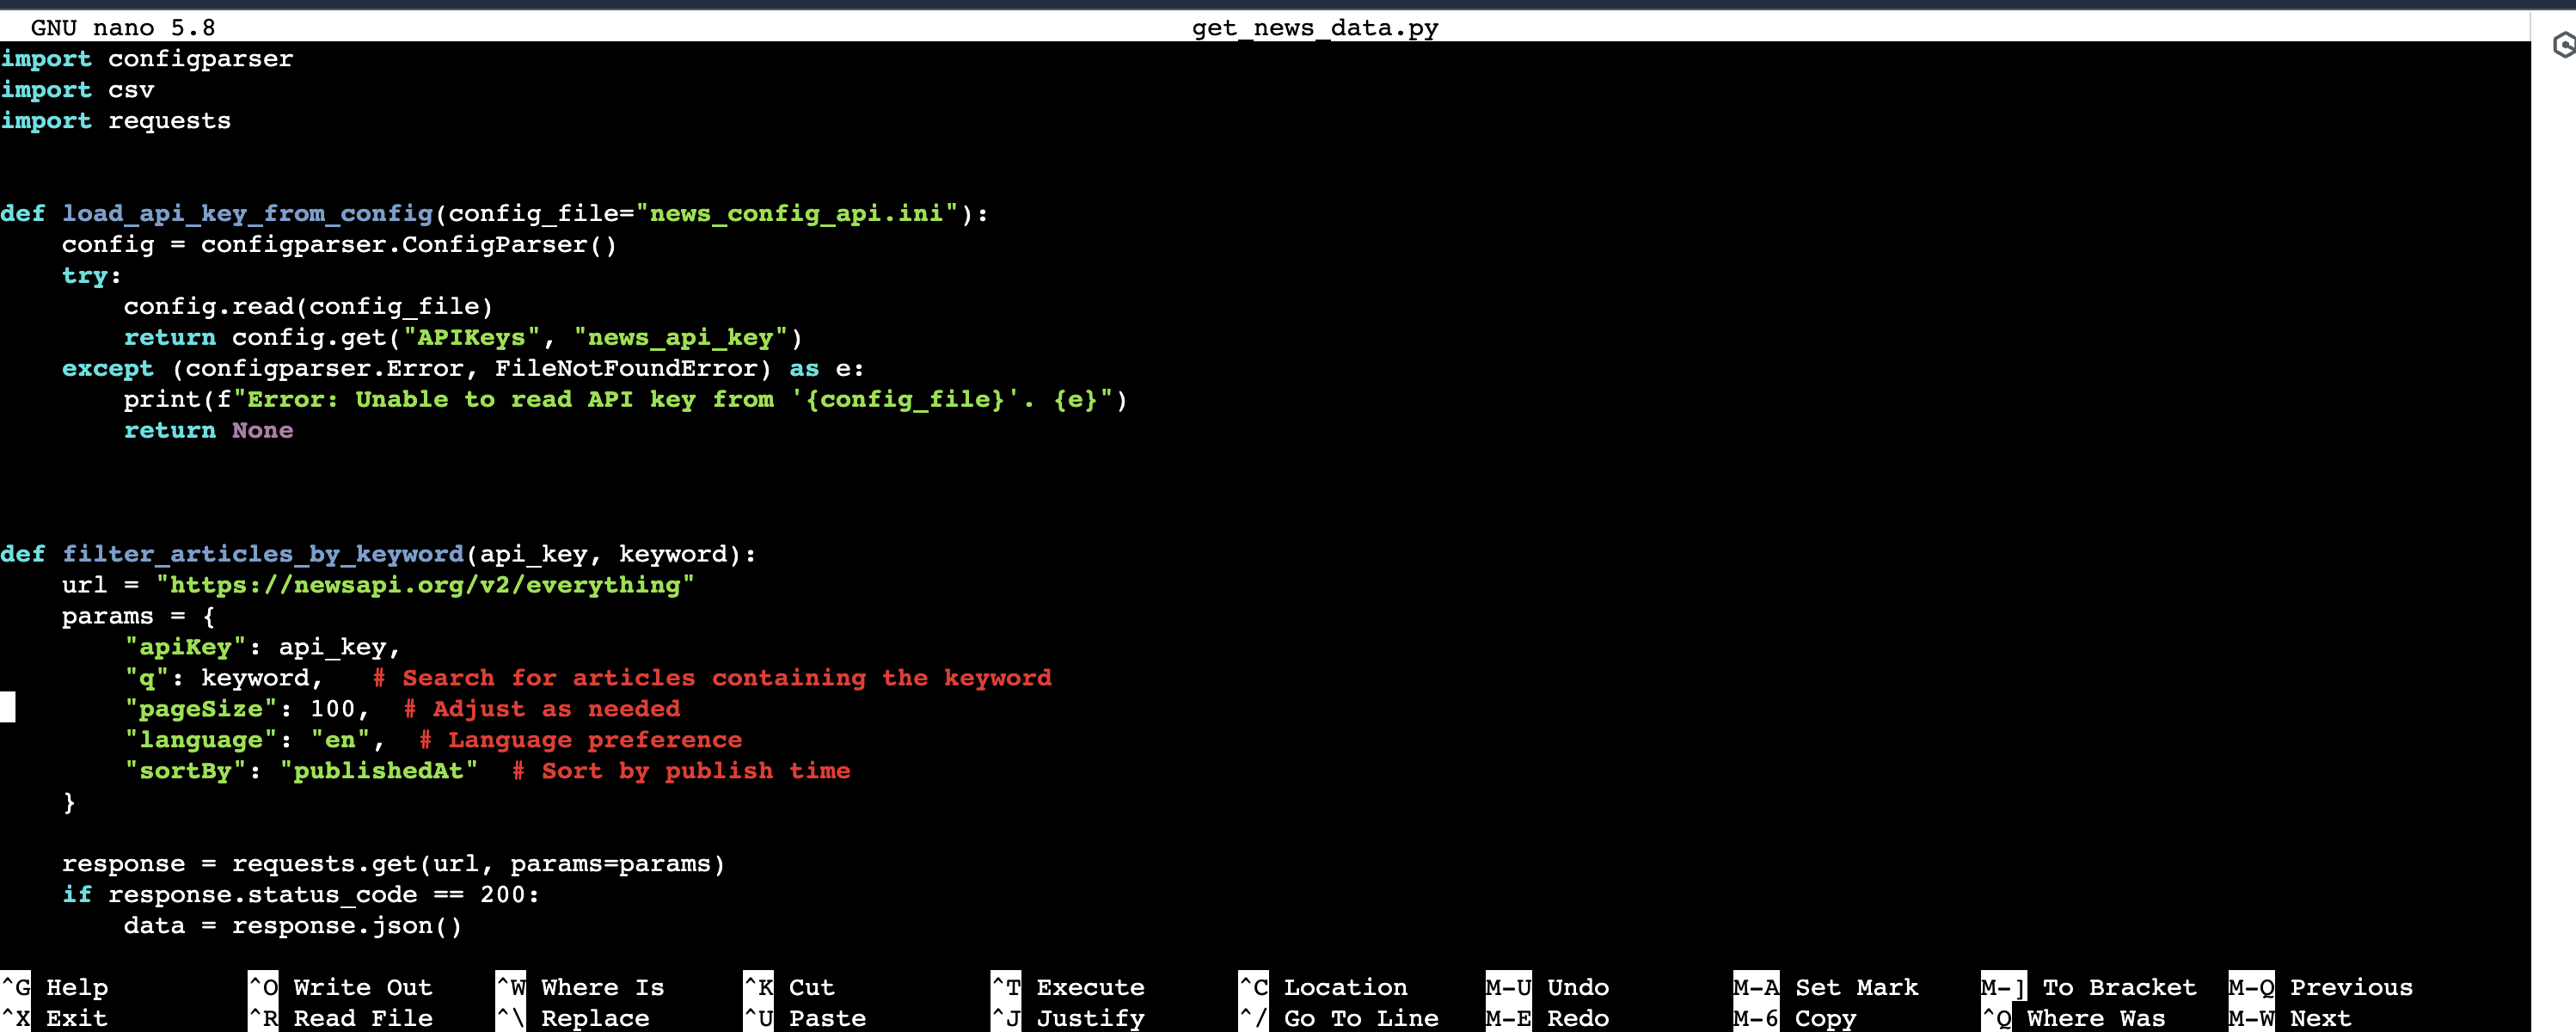

In [56]:
from IPython.display import display, Image
image_path = 'AWS_Screenshots\MicrosoftTeams-image.png'
display(Image(filename=image_path))

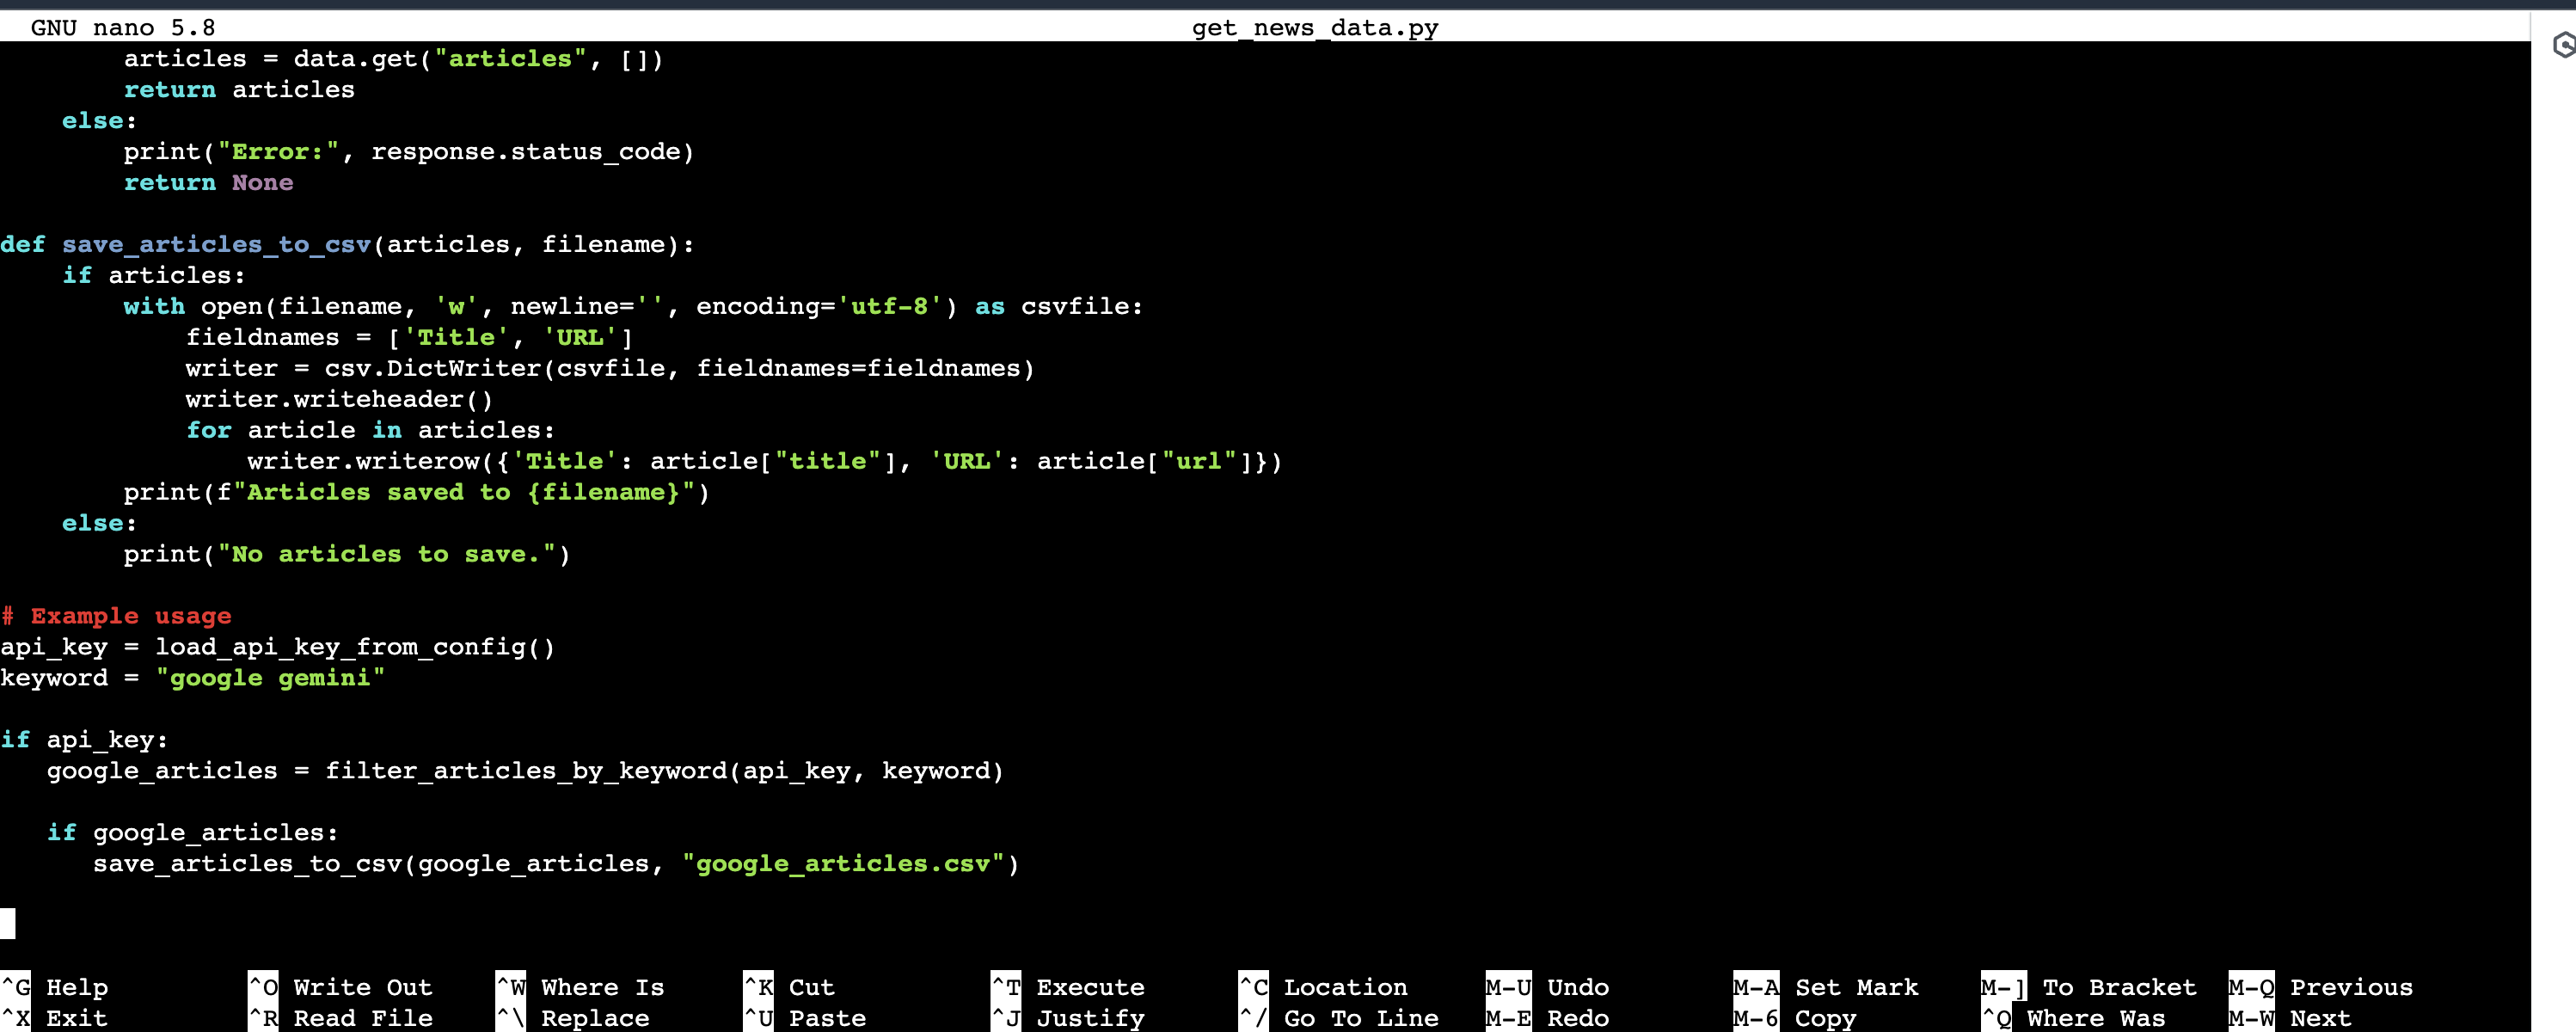

In [57]:
from IPython.display import display, Image
image_path = 'AWS_Screenshots\MicrosoftTeams-image (2).png'
display(Image(filename=image_path))

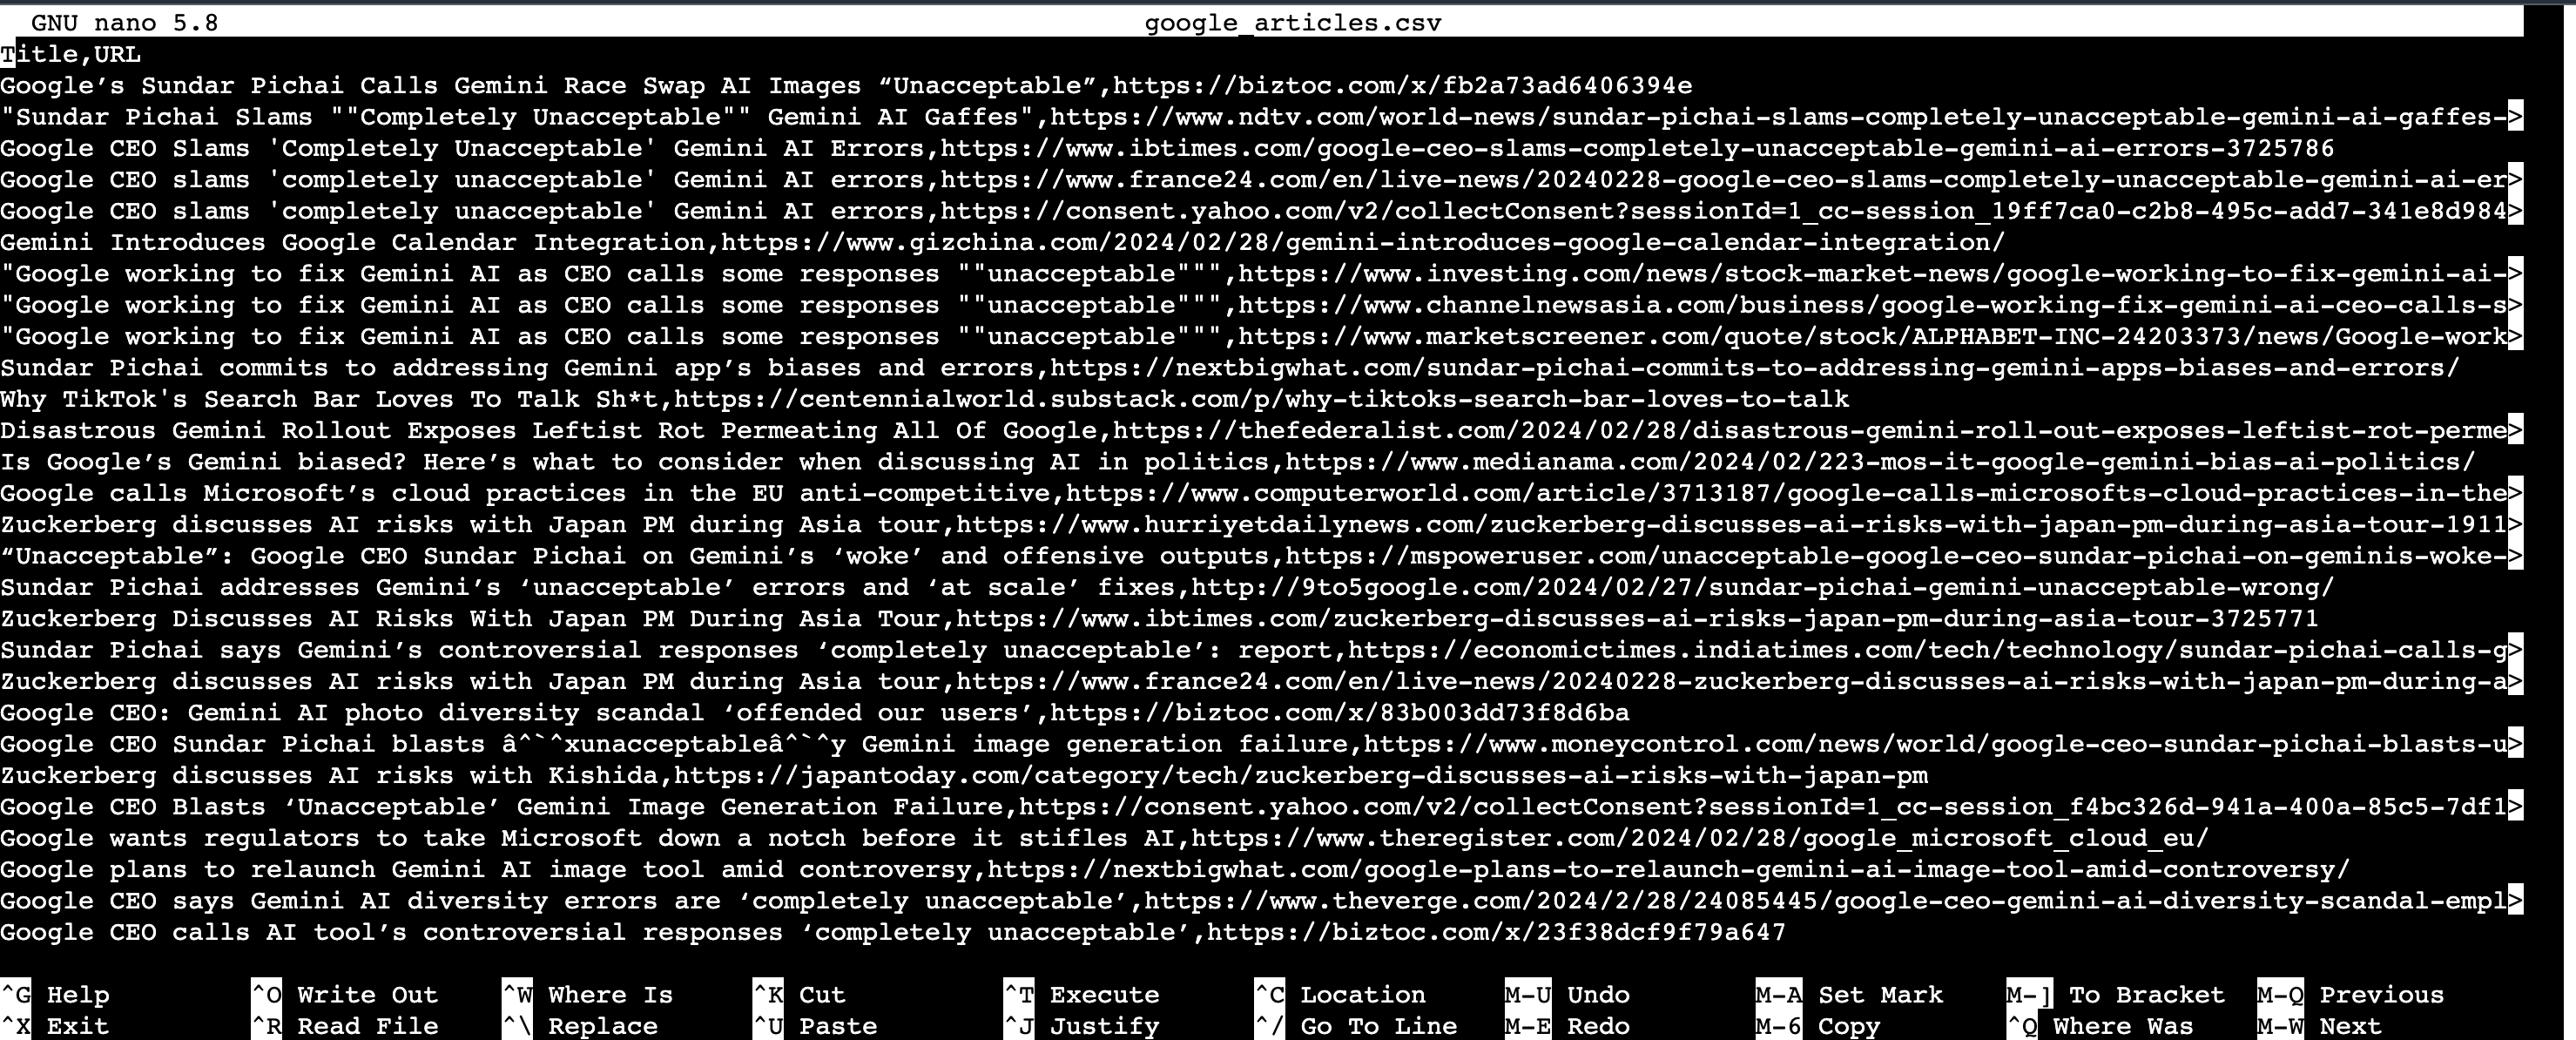

In [9]:
from IPython.display import display, Image
image_path = 'AWS_Screenshots\Screenshot 2024-03-04 at 13.52.45.png'
display(Image(filename=image_path))

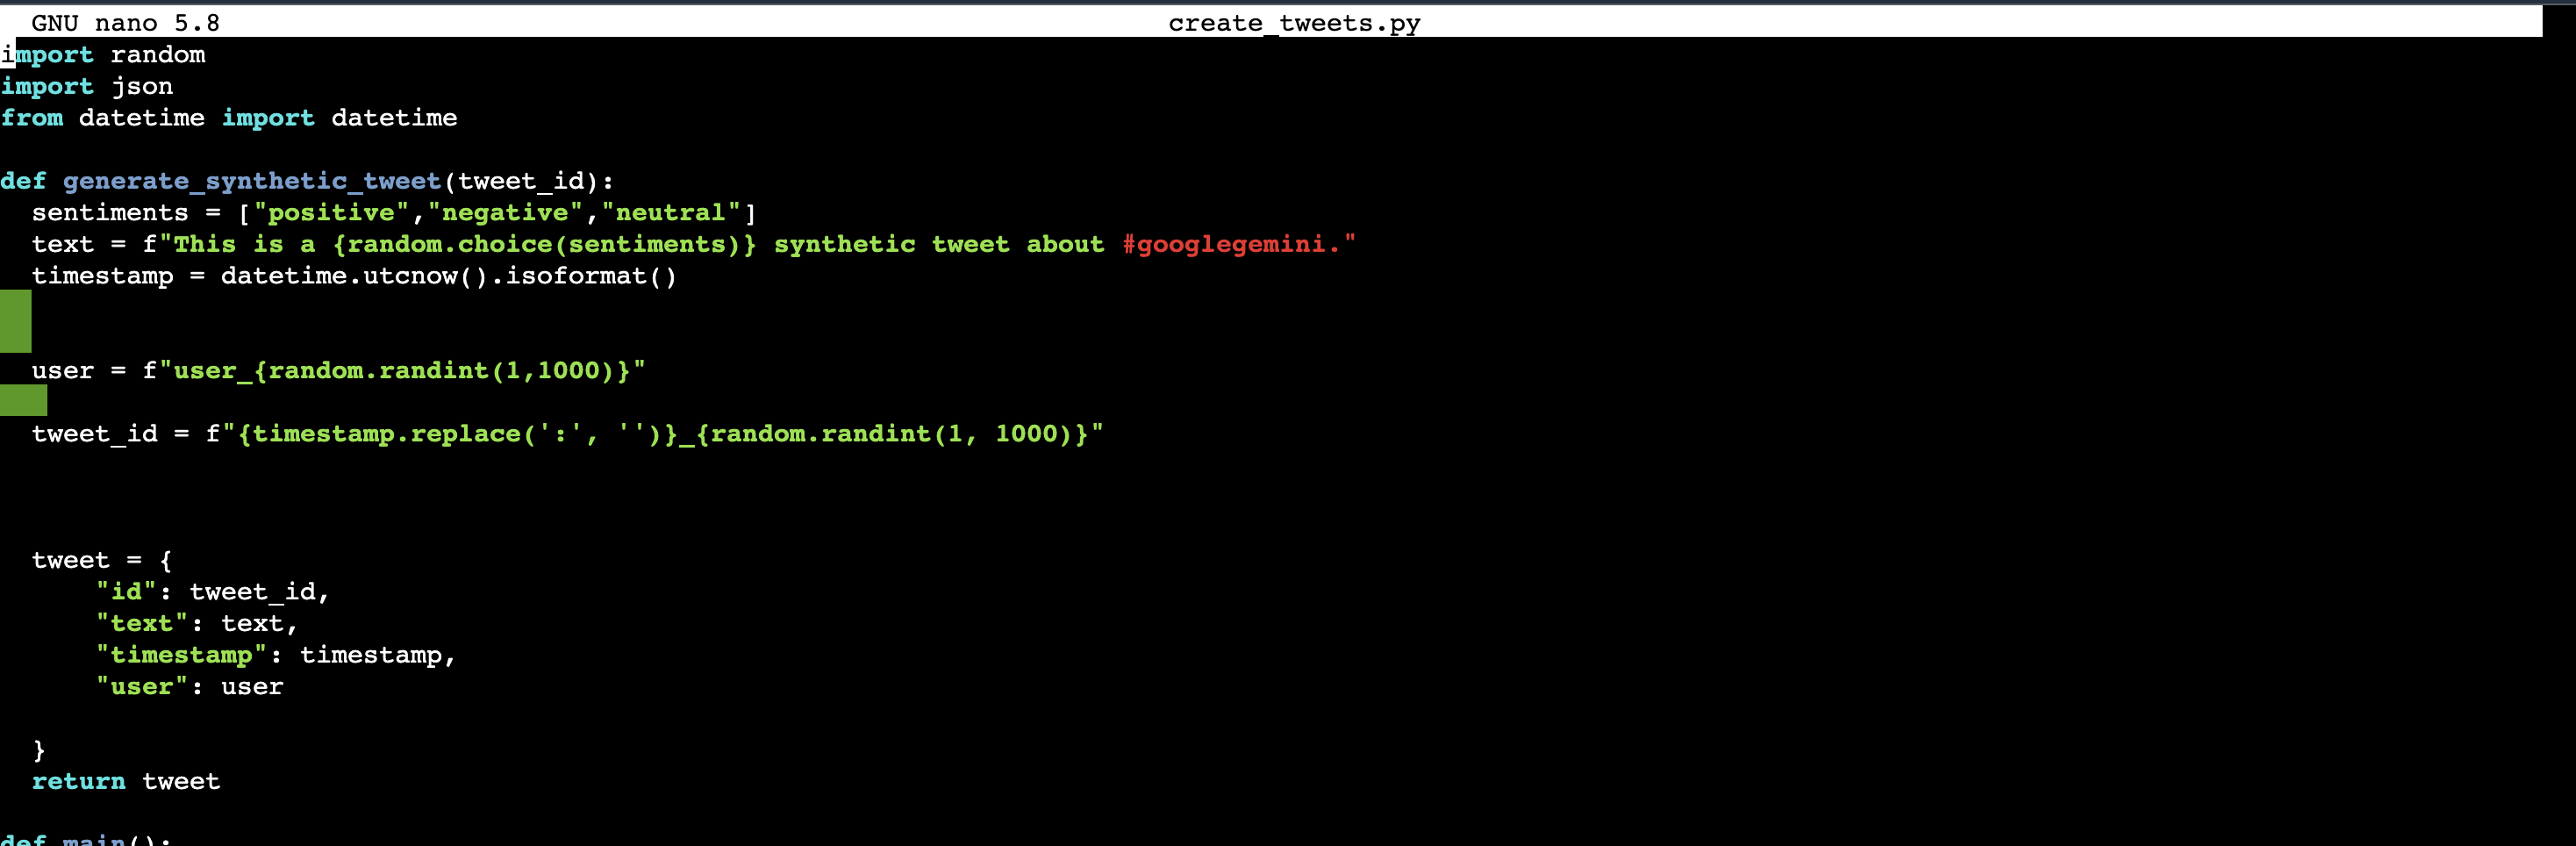

In [10]:
from IPython.display import display, Image
image_path = 'AWS_Screenshots\Screenshot 2024-03-04 at 13.53.46.png'
display(Image(filename=image_path))

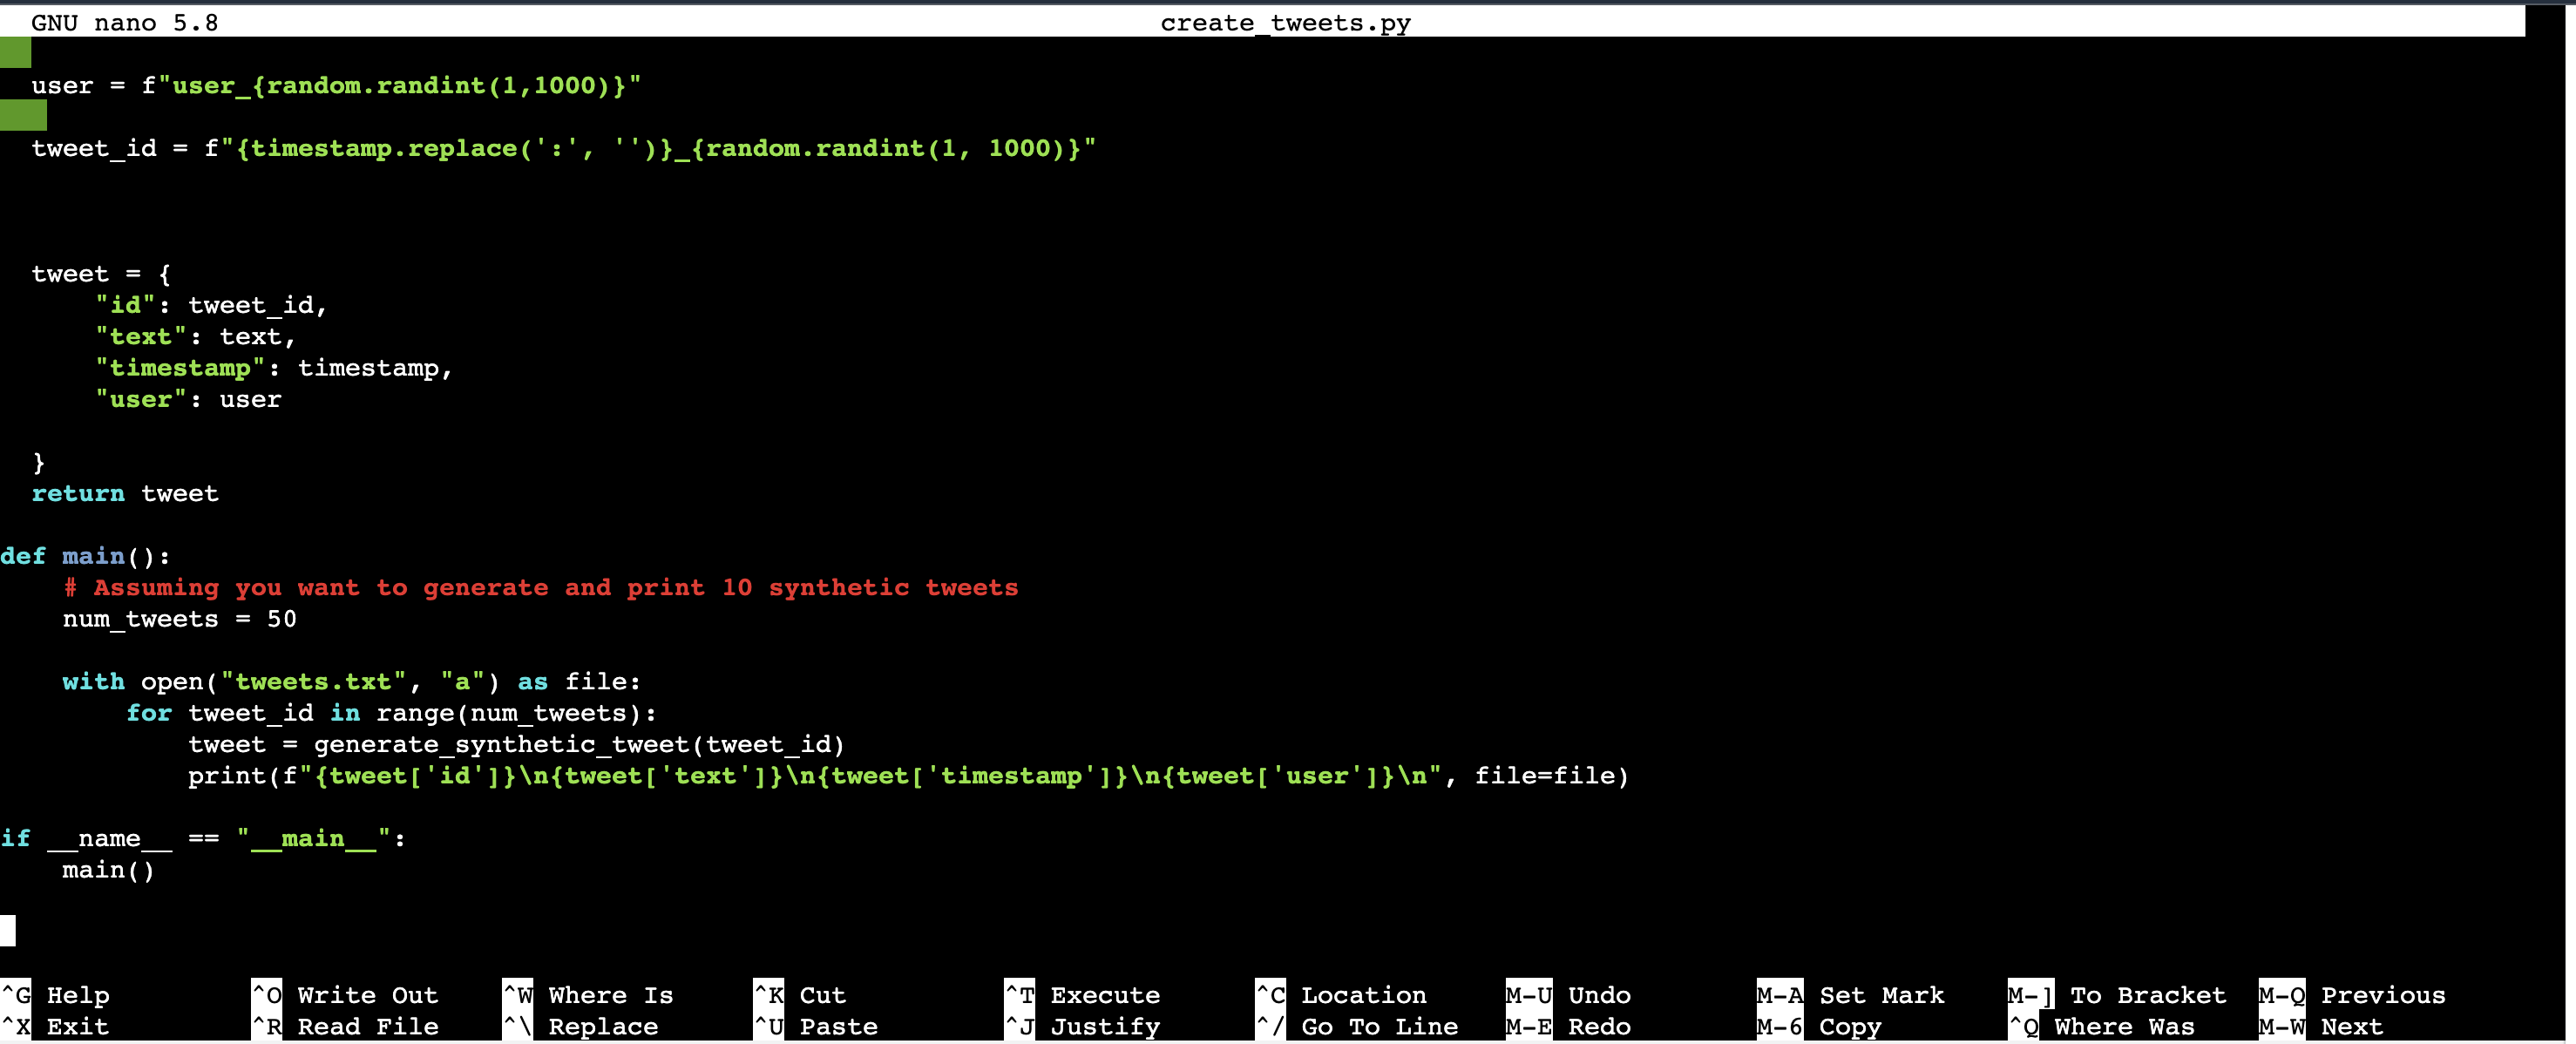

In [11]:
from IPython.display import display, Image
image_path = 'AWS_Screenshots\Screenshot 2024-03-04 at 13.53.57.png'
display(Image(filename=image_path))

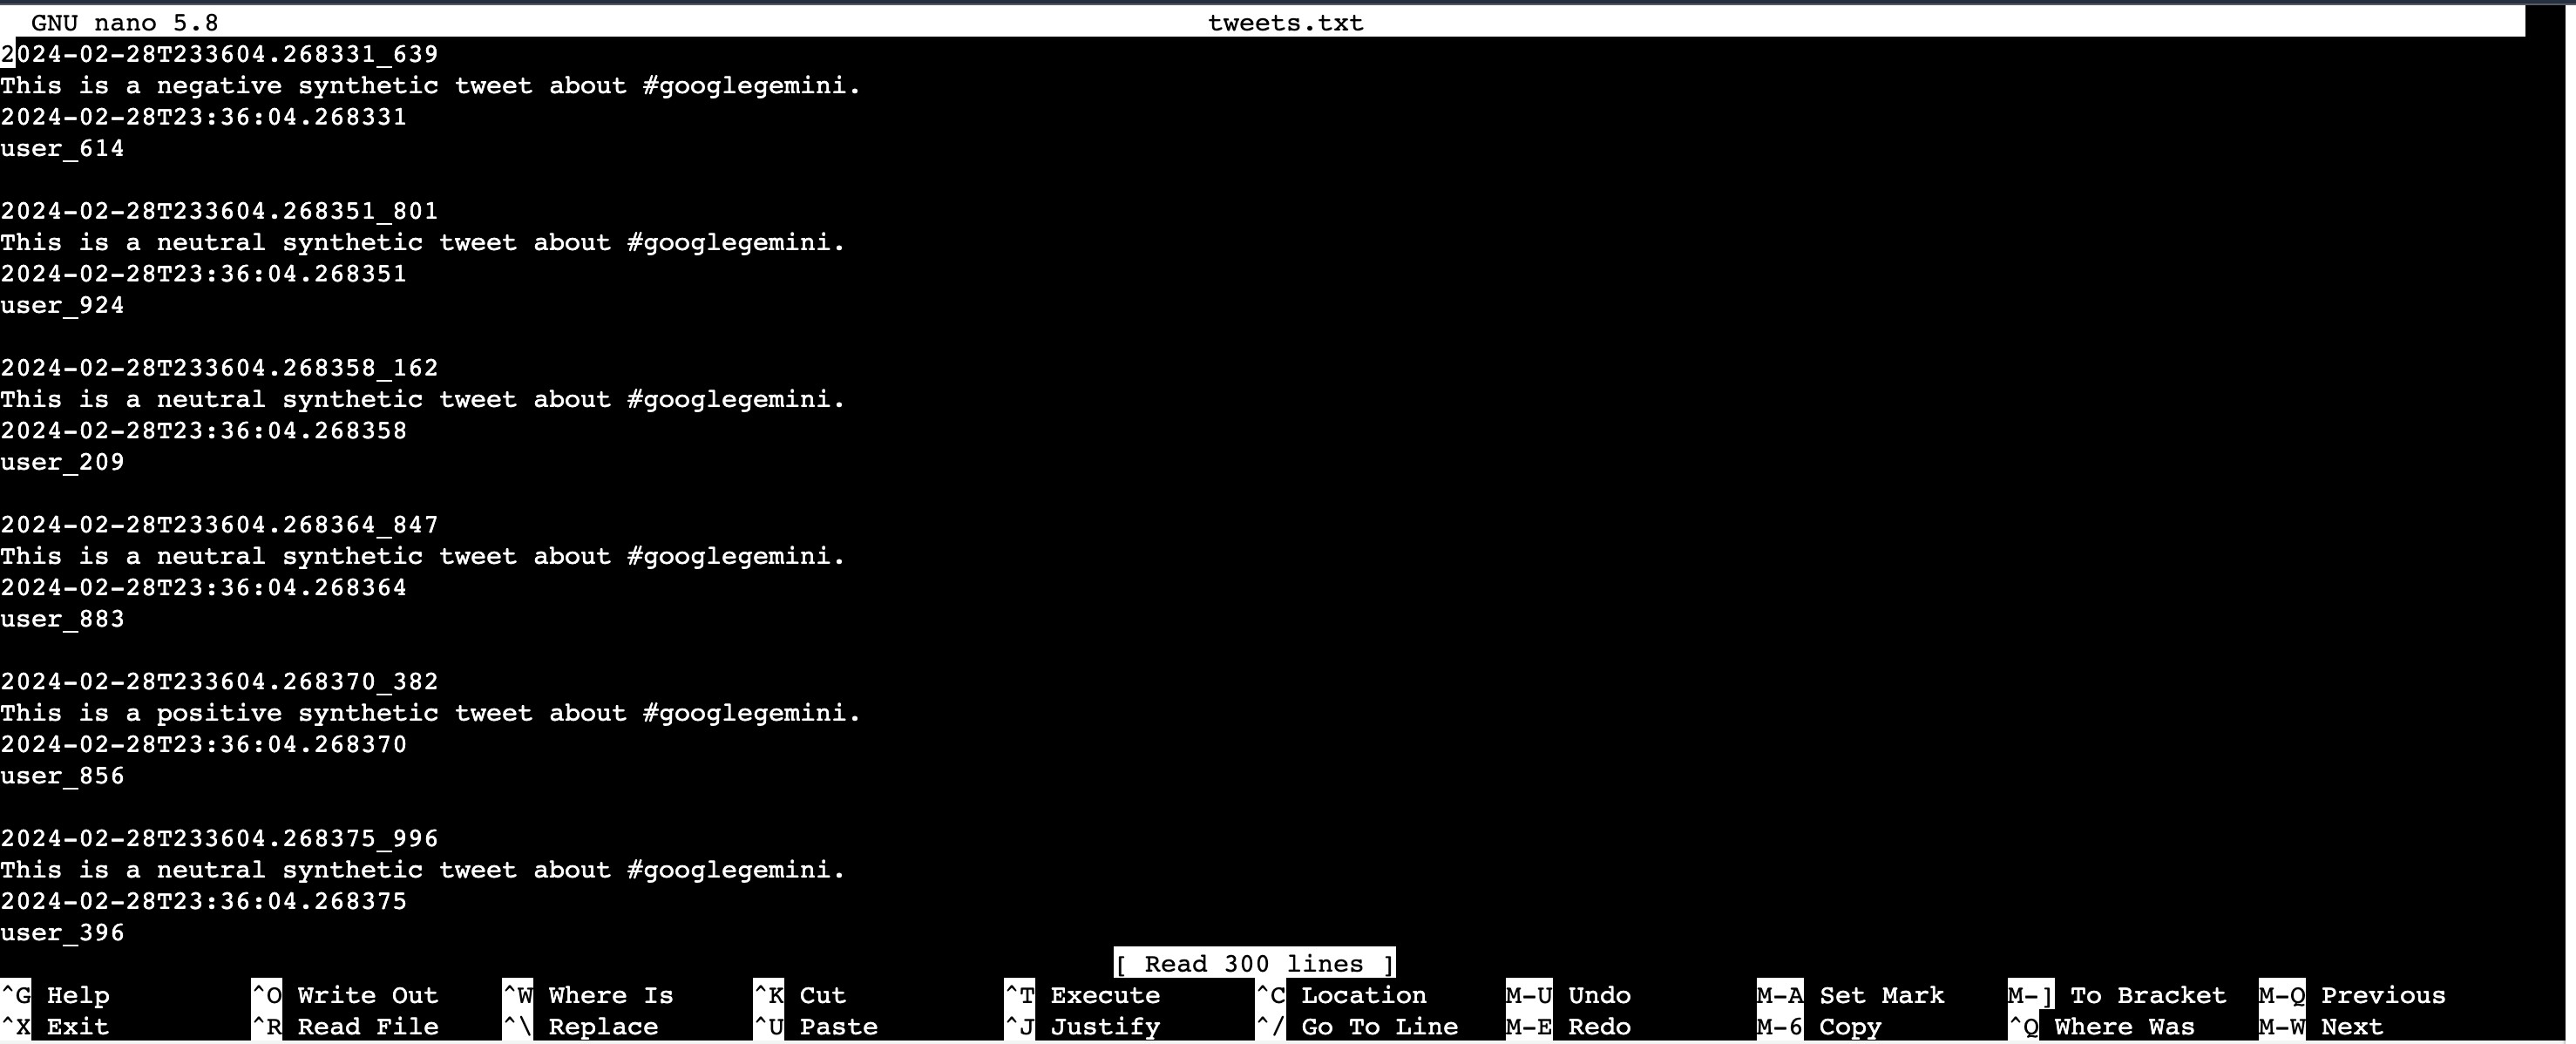

In [12]:
from IPython.display import display, Image
image_path = 'AWS_Screenshots\Screenshot 2024-03-04 at 13.54.18.png'
display(Image(filename=image_path))

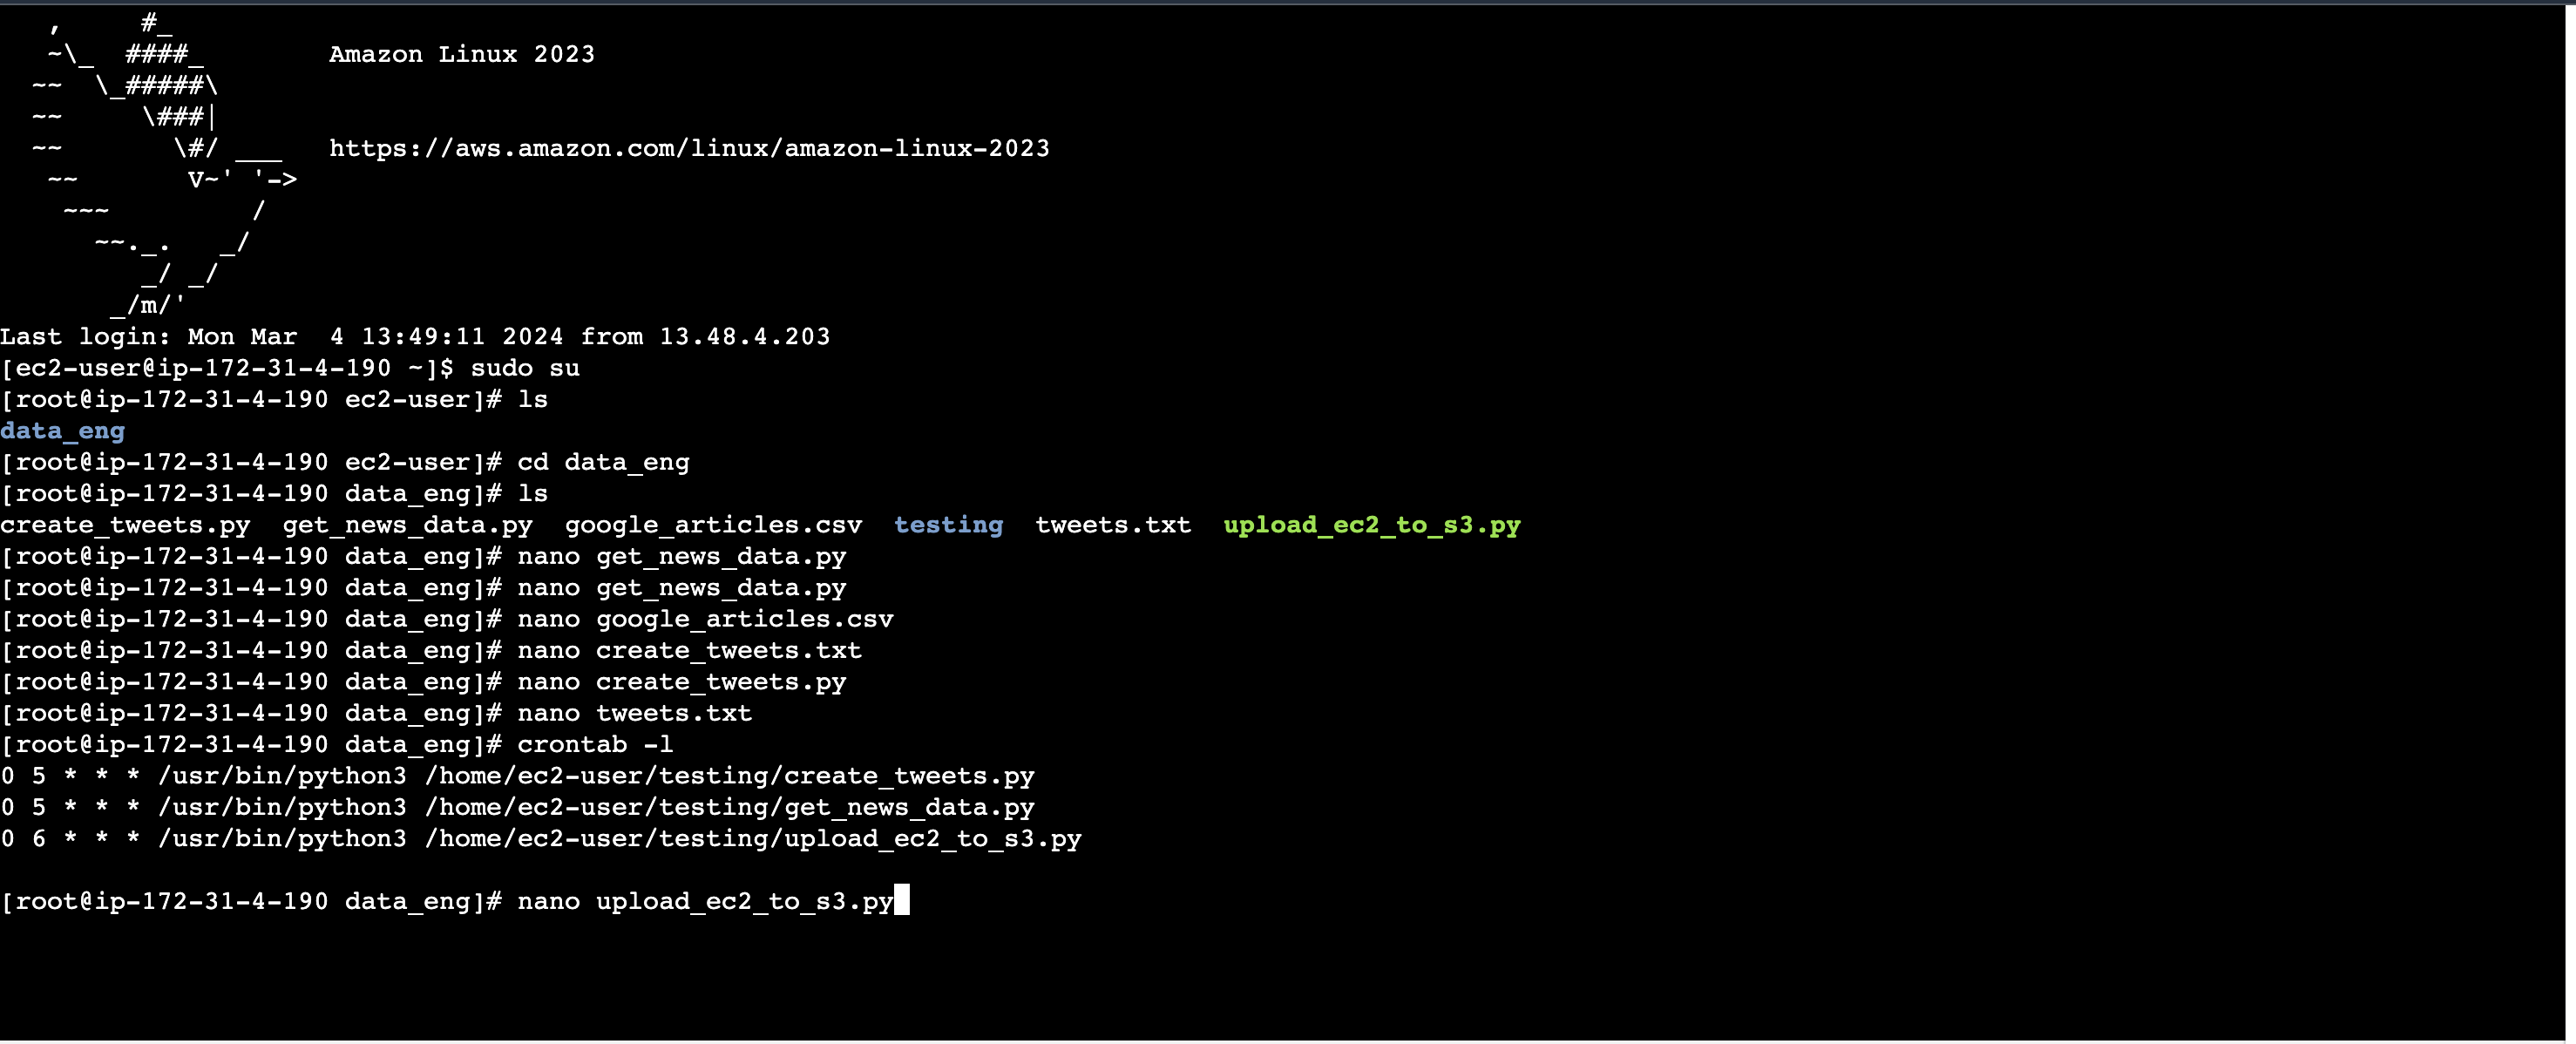

In [13]:
from IPython.display import display, Image
image_path = 'AWS_Screenshots\Screenshot 2024-03-04 at 13.54.53.png'
display(Image(filename=image_path))

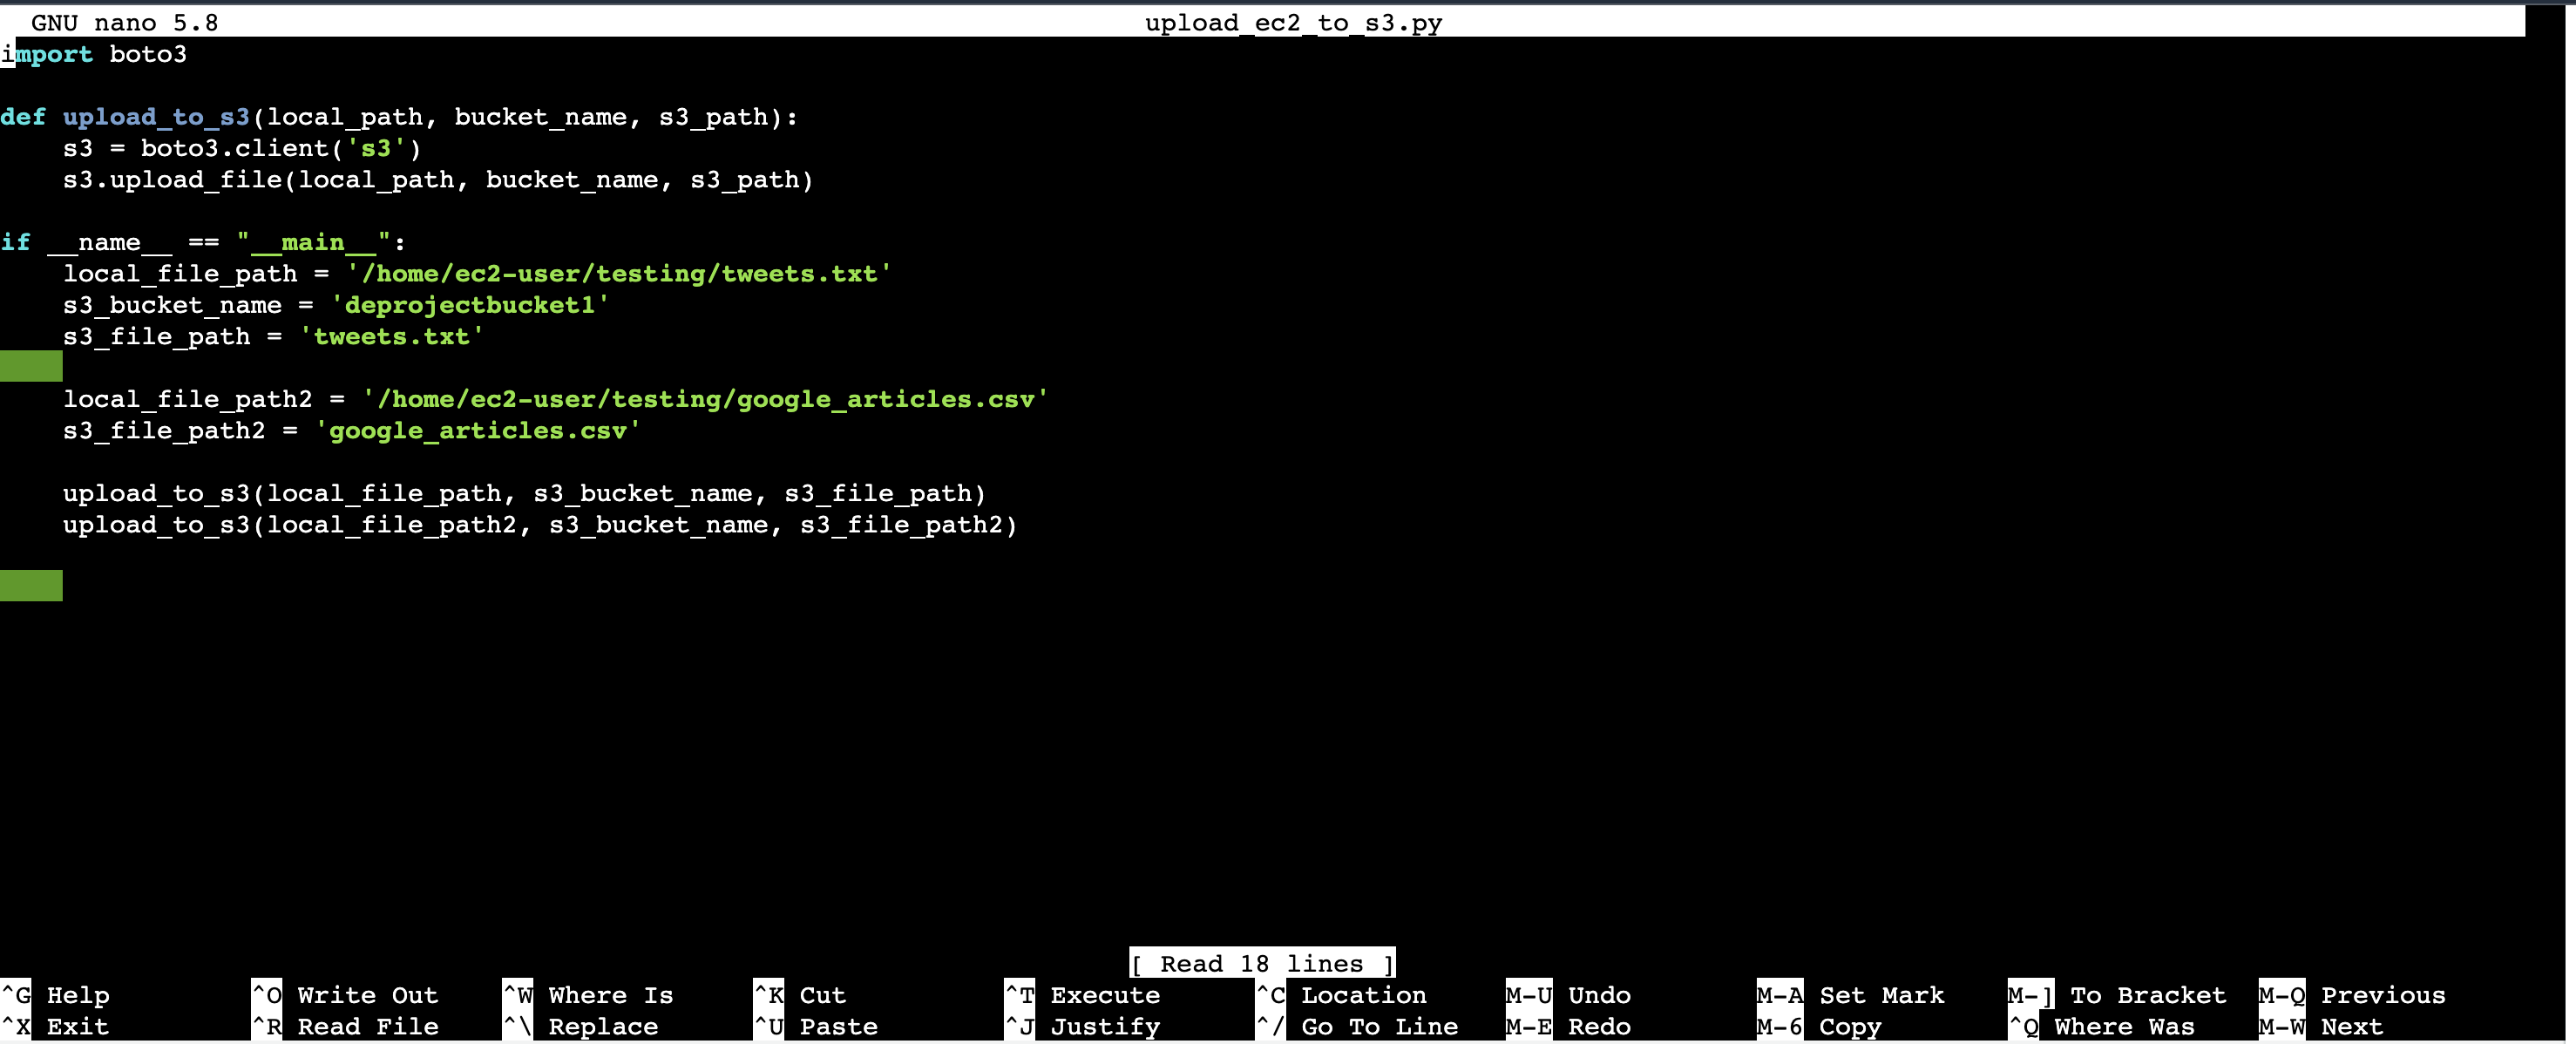

In [14]:
from IPython.display import display, Image
image_path = 'AWS_Screenshots\Screenshot 2024-03-04 at 13.54.58.png'
display(Image(filename=image_path))

# 4. Data Loading <a class="anchor" id="Bullet4"></a>

The data loading section emphasizes the strategic migration of collected data to Amazon S3, chosen for its scalability and reliability in data storage. This section describes creating an S3 bucket, configuring access settings, and utilizing the AWS Command Line Interface for the automated daily transfer of data from the EC2 instance. Subsequently, the data is organized within MongoDB, a decision driven by the database's flexibility and capability for efficient data handling and analysis preparation. This systematic process from EC2 to S3, and finally to MongoDB, ensures that the dataset is not only accessible for local analysis but also optimally arranged for subsequent stages of the project.

-  Data on EC2 Instance: Initially, both the news data (stored as a CSV file) and the fake tweets (stored as a TXT file) are saved in the same location within the EC2 instance. These files contain the aggregated data retrieved from newsapi.org and generated locally, respectively.

- Selecting Amazon S3 for Data Storage: To facilitate further analysis of the data locally on our PC, we choose to move the data to Amazon S3 (Simple Storage Service). Amazon S3 provides scalable, durable, and highly available storage infrastructure, making it an ideal choice for storing large volumes of data such as news headlines and fake tweets.

- Setting up Amazon S3 Bucket: Within the AWS Management Console, we create an Amazon S3 bucket to serve as the destination for our data. We configure the bucket settings to ensure appropriate access control and data durability based on our requirements.

- Moving Data to Amazon S3: Using the AWS CLI (Command Line Interface), we transfer the news data CSV file and the fake tweets TXT file from the EC2 instance to the designated Amazon S3 bucket. Additionally, we export the web scrapped data from Reddit in CSV format and load it into the same S3 bucket. This process involves copying the files from the local storage of the EC2 instance to the specified S3 bucket location. This task is scheduled to run daily at 6 AM using Crontab.

- Ensuring Data Accessibility: After the data is successfully uploaded to the Amazon S3 bucket, we verify that it is accessible and visible within the bucket through the AWS Management Console. We ensure that the necessary permissions are configured to allow access to the data as required for further analysis.

- Utilizing Amazon S3 for Data Analysis: With the data securely stored in Amazon S3, we can now perform sentiment analysis and other analytical tasks locally on our PC. We leverage the flexibility and scalability of Amazon S3 to seamlessly access and analyze the data using various tools and frameworks available for data processing and analysis.

- Storing Data in MongoDB: Once the data is retrieved from Amazon S3, we store it locally in MongoDB, a NoSQL database known for its flexibility and scalability. MongoDB allows us to organize and manage the retrieved data efficiently, facilitating further data transformation and analysis. We plan to perform additional data transformation tasks within MongoDB to prepare the data for insights and visualization.

In summary, the process involves transferring the news data, fake tweets, and web scrapped data from Reddit from the EC2 instance to an Amazon S3 bucket to enable further analysis locally on our PC. By leveraging the capabilities of Amazon S3 for scalable and durable data storage and MongoDB for data transformation, we ensure seamless access and manipulation of the data for analytical purposes while maintaining security and reliability. The data transfer task to the S3 bucket is scheduled to run daily at 6 AM using Crontab.

### 4.1. Amazon S3  <a class="anchor" id="Bullet4.1"></a>

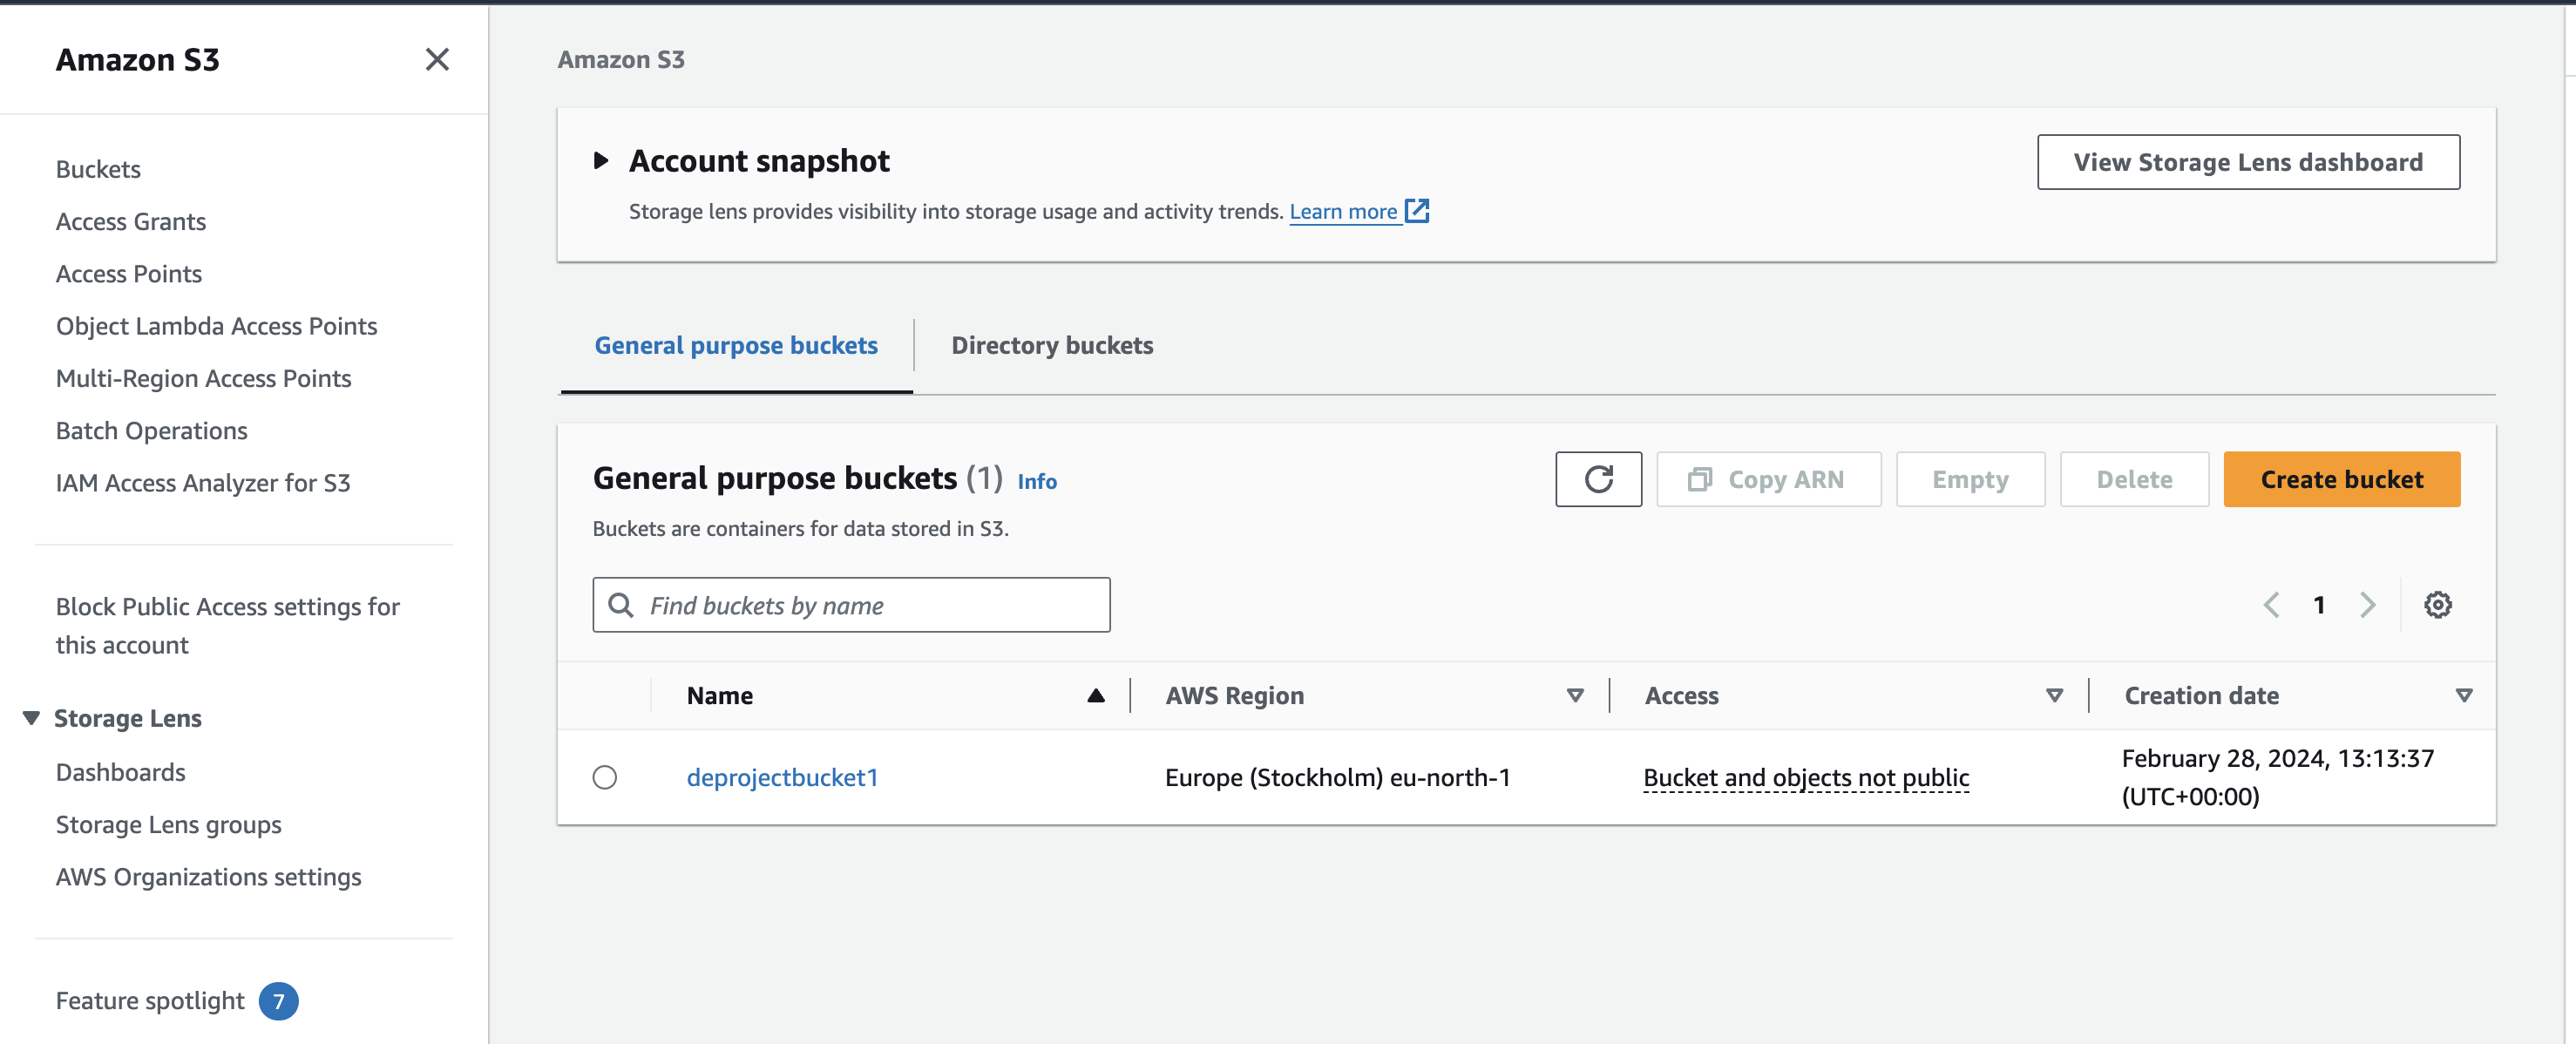

In [15]:
from IPython.display import display, Image
image_path = 'AWS_Screenshots\Screenshot 2024-03-04 at 13.55.20.png'
display(Image(filename=image_path))

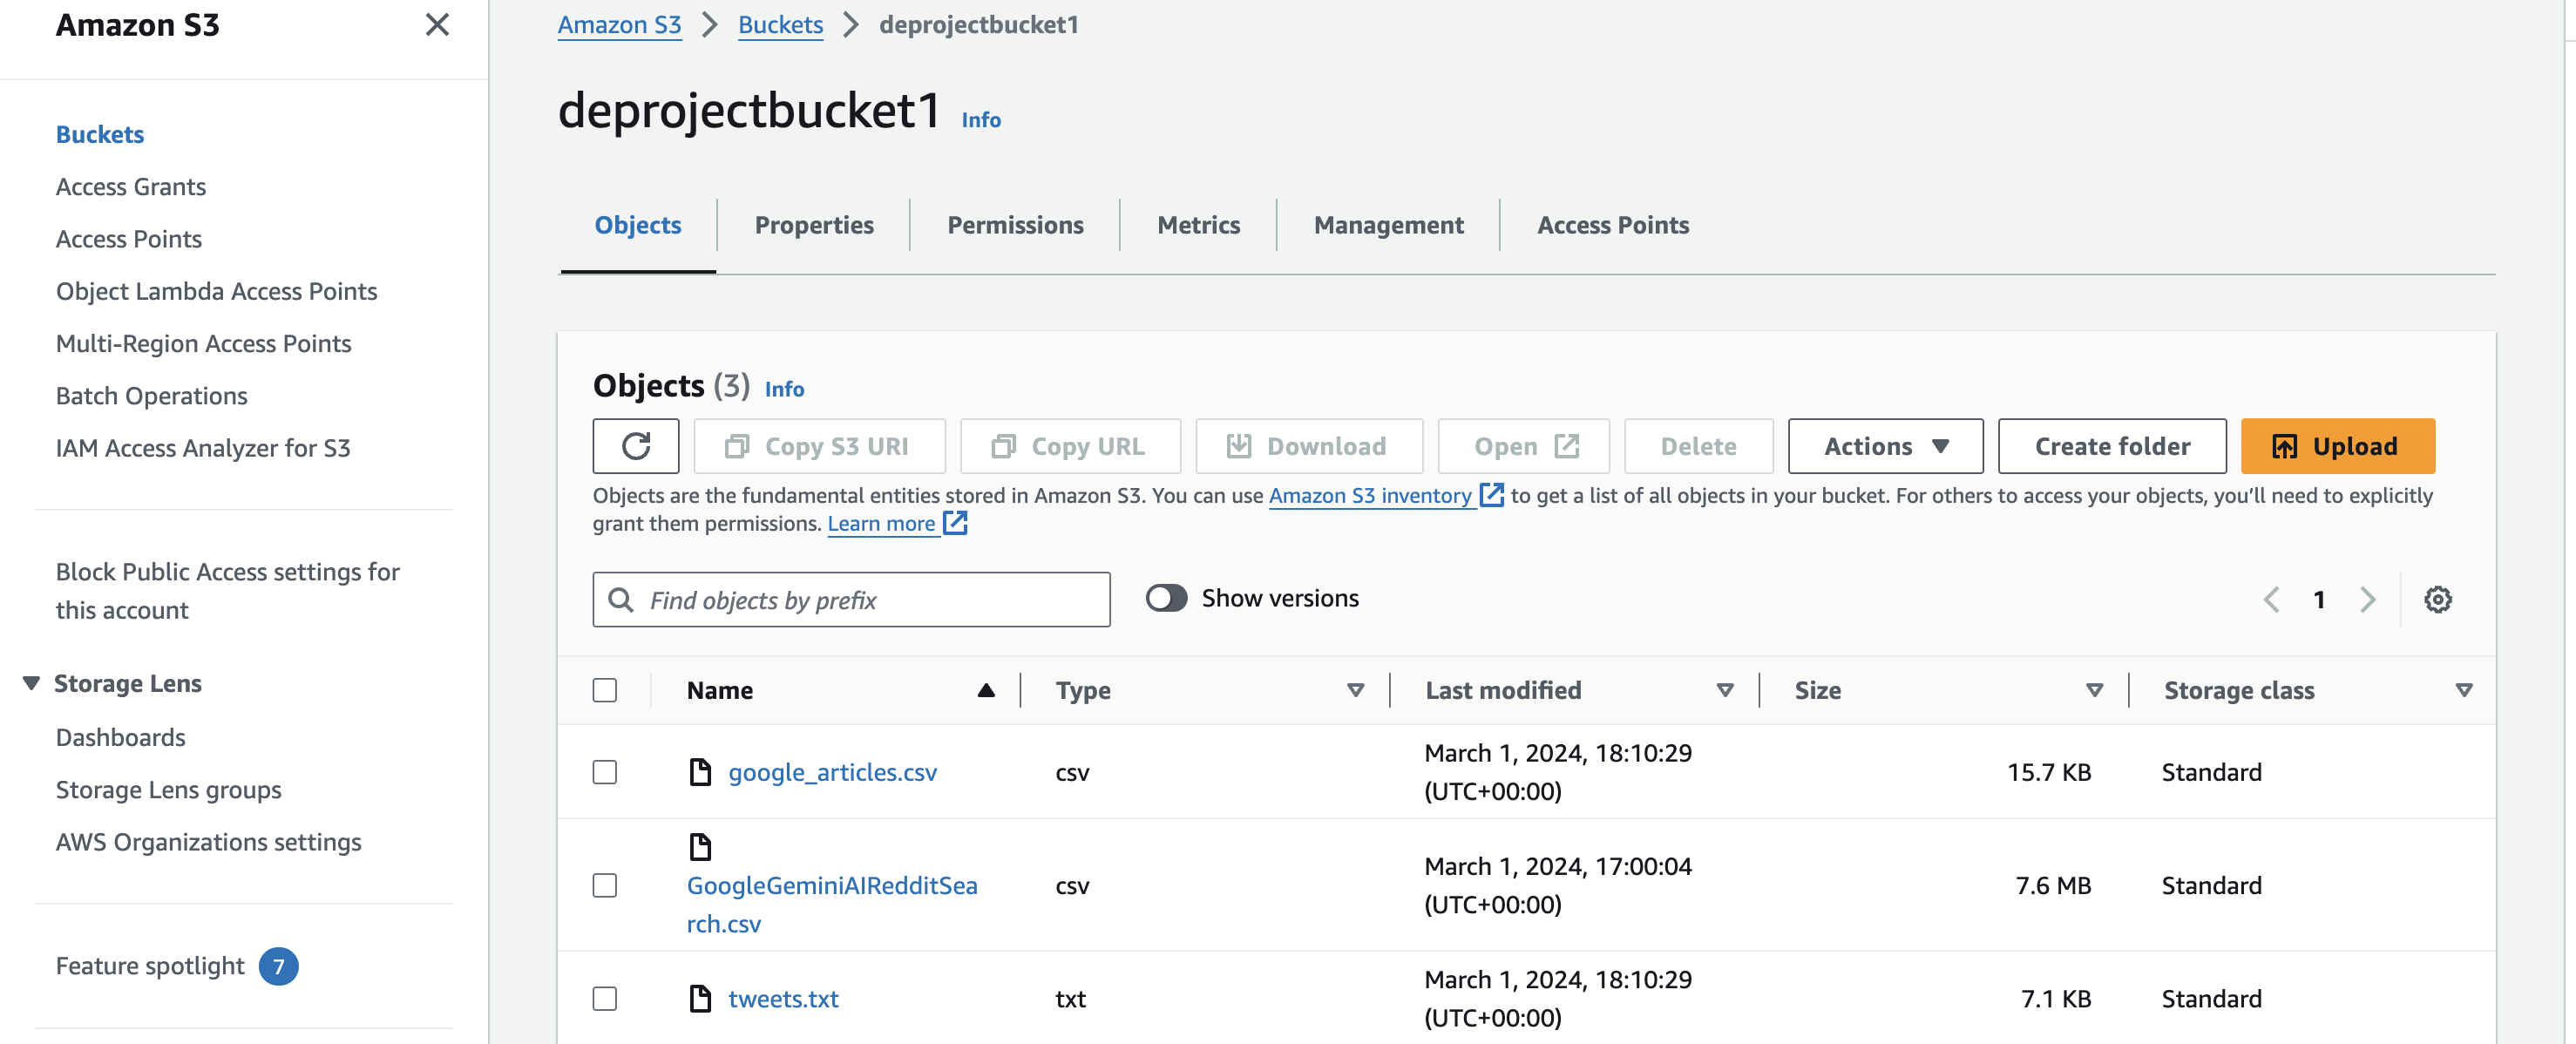

In [16]:
from IPython.display import display, Image
image_path = 'AWS_Screenshots\Screenshot 2024-03-04 at 13.55.29.png'
display(Image(filename=image_path))

Fetch data from AWS cloud using S3 bucket and tranforming data into pandas data frame.

Note: To install packages used, uncomment the %pip install lines

In [17]:

# %pip install boto3
# %pip install textblob
# %pip install wordcloud
# %pip install pyarrow
# %pip install s3fs
# %pip install pymongo
# %pip install pysqlite3
# %pip install nltk

Connecting to S3:

In [18]:
import boto3
import pandas as pd

s3 = boto3.client('s3')

C:\Users\Aayush Ladda\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [19]:
import configparser
import os

# Initialize the configuration parser
config = configparser.ConfigParser()

# Specify the path to your configuration file
config_file_path = 'aws_config.ini'

# Read the configuration file
config.read(config_file_path)

# Access AWS credentials
aws_region = config.get('aws', 'region')
aws_access_key_id = config.get('aws', 'access_key_id')
aws_secret_access_key = config.get('aws', 'secret_access_key')

# Set environment variables
os.environ["AWS_DEFAULT_REGION"] = aws_region
os.environ["AWS_ACCESS_KEY_ID"] = aws_access_key_id
os.environ["AWS_SECRET_ACCESS_KEY"] = aws_secret_access_key

# Now you can use AWS SDKs or libraries with the configured credentials . 


In [20]:

s3 = boto3.resource(
  service_name='s3',
  region_name= aws_region,
  aws_access_key_id=aws_access_key_id,
  aws_secret_access_key=aws_secret_access_key
)

In [21]:
 # Print out bucket names
for bucket in s3.buckets.all():
    print(bucket.name)


deprojectbucket1


In [22]:
for obj in s3.Bucket('deprojectbucket1').objects.all():
    print(obj)

s3.ObjectSummary(bucket_name='deprojectbucket1', key='GoogleGeminiAIRedditSearch.csv')
s3.ObjectSummary(bucket_name='deprojectbucket1', key='google_articles.csv')
s3.ObjectSummary(bucket_name='deprojectbucket1', key='tweets.txt')


Loading the files from S3 bucket to Python Dataframes using Pandas:

In this step we create the three dataframes for the three sources that we have.
- df_reddit for the we scrapped data from reddit.
- df_newsarticles for all the news headlines retreived from the API.
- df_tweet for all the generated tweets.

In [23]:
# Load csv file directly into python
obj = s3.Bucket('deprojectbucket1').Object('GoogleGeminiAIRedditSearch.csv').get()
df_reddit = pd.read_csv(obj['Body'], index_col=0)

# Load csv file directly into python
obj = s3.Bucket('deprojectbucket1').Object('google_articles.csv').get()
df_newsarticles = pd.read_csv(obj['Body'], index_col=0)

# Initialize the S3 client
s3_client = boto3.client('s3')

# Specify the bucket name and file key
bucket_name = 'deprojectbucket1'
file_key = 'tweets.txt'

# Get the content of the .txt file from S3
response = s3_client.get_object(Bucket=bucket_name, Key=file_key)
df_tweets = response['Body'].read().decode('utf-8')

# Split the text data into lines
lines = df_tweets.split('\n')

# Remove empty lines
lines = [line for line in lines if line]

# Create a list to store data
data = []

# Iterate over lines to extract data
for i in range(0, len(lines), 4):
    timestamp = lines[i]
    tweet_content = lines[i + 1]
    tweet_time = lines[i + 2]
    user = lines[i + 3]

    # Append data to the list
    data.append([timestamp, tweet_content, tweet_time, user])

# Create a DataFrame
df_twt = pd.DataFrame(data, columns=['Timestamp', 'Tweet_Content', 'Tweet_Time', 'User'])


In [24]:
# Transformation: data cleaning by reseting index for the 2 misloaded 
df_reddit.reset_index(inplace=True)
df_newsarticles.reset_index(inplace=True)

Let us now check and verify the data loaded in the dataframes above:

In [25]:
#check information of files 

df_reddit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239 entries, 0 to 238
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Content1  239 non-null    object
 1   Content   239 non-null    object
 2   Content2  239 non-null    object
 3   Content3  239 non-null    object
 4   Content4  239 non-null    object
 5   Content5  239 non-null    object
 6   Content6  239 non-null    object
 7   Content7  239 non-null    object
 8   Text      239 non-null    object
 9   _Text     239 non-null    object
 10  _Link     239 non-null    object
dtypes: object(11)
memory usage: 20.7+ KB


In [26]:
df_newsarticles.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Title   100 non-null    object
 1   URL     100 non-null    object
dtypes: object(2)
memory usage: 1.7+ KB


In [27]:
df_twt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Timestamp      60 non-null     object
 1   Tweet_Content  60 non-null     object
 2   Tweet_Time     60 non-null     object
 3   User           60 non-null     object
dtypes: object(4)
memory usage: 2.0+ KB


In [28]:
df_reddit.head()

Content1                                          Content  \
0                 r/poland                 https://www.reddit.com/r/poland/   
1  r/ArtificialInteligence  https://www.reddit.com/r/ArtificialInteligence/   
2         r/GoogleGeminiAI         https://www.reddit.com/r/GoogleGeminiAI/   
3        r/MachineLearning        https://www.reddit.com/r/MachineLearning/   
4       r/soccercirclejerk       https://www.reddit.com/r/soccercirclejerk/   

     Content2                                           Content3  \
0  2 days ago  https://www.reddit.com/r/poland/comments/1ax4w...   
1  3 days ago  https://www.reddit.com/r/ArtificialInteligence...   
2  3 days ago  https://www.reddit.com/r/GoogleGeminiAI/commen...   
3   3 mo. ago  https://www.reddit.com/r/MachineLearning/comme...   
4   1 day ago  https://www.reddit.com/r/soccercirclejerk/comm...   

                                            Content4           Content5  \
0  Maria Skłodowska-Curie according to Google's G...  2.5K\n      votes   
1  Google Gemini AI-image generator refuses to ge...   489\n      votes   
2                               I use GoogleGeminiAI     0\n      votes   
3  [D] Is Google Gemini the real deal or a public...   103\n      votes   
4                 outjerked by woke google gemini ai  1.2K\n      votes   

  Content6  Content7                                               Text  \
0      258  comments  SEARCH RESULTS\n    \n   \n    \n      \n     ...   
1      423  comments  SEARCH RESULTS\n    \n   \n    \n      \n     ...   
2        0  comments  SEARCH RESULTS\n    \n   \n    \n      \n     ...   
3       77  comments  SEARCH RESULTS\n    \n   \n    \n      \n     ...   
4       30  comments  SEARCH RESULTS\n    \n   \n    \n      \n     ...   

                                               _Text  \
0  Maria Skłodowska-Curie according to Google's G...   
1  Google Gemini AI-image generator refuses to ge...   
2                               I use GoogleGeminiAI   
3  [D] Is Google Gemini the real deal or a public...   
4                 outjerked by woke google gemini ai   

                                               _Link  
0  https://www.reddit.com/r/poland/comments/1ax4w...  
1  https://www.reddit.com/r/ArtificialInteligence...  
2  https://www.reddit.com/r/GoogleGeminiAI/commen...  
3  https://www.reddit.com/r/MachineLearning/comme...  
4  https://www.reddit.com/r/soccercirclejerk/comm...

In [29]:
df_newsarticles.head()

Title  \
0  Google’s Sundar Pichai Calls Gemini Race Swap ...   
1  Sundar Pichai Slams "Completely Unacceptable" ...   
2  Google CEO Slams 'Completely Unacceptable' Gem...   
3  Google CEO slams 'completely unacceptable' Gem...   
4  Google CEO slams 'completely unacceptable' Gem...   

                                                 URL  
0              https://biztoc.com/x/fb2a73ad6406394e  
1  https://www.ndtv.com/world-news/sundar-pichai-...  
2  https://www.ibtimes.com/google-ceo-slams-compl...  
3  https://www.france24.com/en/live-news/20240228...  
4  https://consent.yahoo.com/v2/collectConsent?se...

In [30]:
df_twt.head()

Timestamp  \
0  2024-02-28T233604.268331_639   
1  2024-02-28T233604.268351_801   
2  2024-02-28T233604.268358_162   
3  2024-02-28T233604.268364_847   
4  2024-02-28T233604.268370_382   

                                       Tweet_Content  \
0  This is a negative synthetic tweet about #goog...   
1  This is a neutral synthetic tweet about #googl...   
2  This is a neutral synthetic tweet about #googl...   
3  This is a neutral synthetic tweet about #googl...   
4  This is a positive synthetic tweet about #goog...   

                   Tweet_Time      User  
0  2024-02-28T23:36:04.268331  user_614  
1  2024-02-28T23:36:04.268351  user_924  
2  2024-02-28T23:36:04.268358  user_209  
3  2024-02-28T23:36:04.268364  user_883  
4  2024-02-28T23:36:04.268370  user_856

In [31]:
# Save the DataFrame to a CSV file
df_reddit.to_csv('reddit.csv', index=False)
df_newsarticles.to_csv('newsarticles.csv', index=False)
df_twt.to_csv('tweets.csv', index=False)

### 4.2. MongoDB  <a class="anchor" id="Bullet4.2"></a>

In the next step, we load data into MongoDB to perform basic data table transformtion, query for only the needed fields in each table.

In [32]:
# Connect to MongoDB client
from pymongo import MongoClient

client = MongoClient('mongodb://localhost:27017/')
db = client['sentimentdb']
db

Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'sentimentdb')

# 5. Data Transformation <a class="anchor" id="Bullet5"></a>

This section outlines the comprehensive steps taken to refine and consolidate the dataset for analysis. Initially, the data is segmented and cleaned within MongoDB, organizing it into distinct collections based on the source. The narrative then shifts to the adoption of SQLite3 for its minimalistic yet powerful features, ideal for amalgamating the processed data into a single, unified table. This strategic choice facilitates a streamlined data structure, enhancing the ease of management and analysis. SQLite3’s efficient querying and flexible schema capabilities are highlighted as critical to preparing the dataset for detailed sentiment analysis, ensuring readiness for insightful extraction and interpretation.

In [33]:
# Insert a multiple documents/records into reddit collection
db['reddit'].drop()
collection = db['reddit'] # Use or create a collection named 'reddit' 
collection.insert_many(df_reddit.to_dict('records'))

InsertManyResult([ObjectId('65e830e4f254289a6d83b2fb'), ObjectId('65e830e4f254289a6d83b2fc'), ObjectId('65e830e4f254289a6d83b2fd'), ObjectId('65e830e4f254289a6d83b2fe'), ObjectId('65e830e4f254289a6d83b2ff'), ObjectId('65e830e4f254289a6d83b300'), ObjectId('65e830e4f254289a6d83b301'), ObjectId('65e830e4f254289a6d83b302'), ObjectId('65e830e4f254289a6d83b303'), ObjectId('65e830e4f254289a6d83b304'), ObjectId('65e830e4f254289a6d83b305'), ObjectId('65e830e4f254289a6d83b306'), ObjectId('65e830e4f254289a6d83b307'), ObjectId('65e830e4f254289a6d83b308'), ObjectId('65e830e4f254289a6d83b309'), ObjectId('65e830e4f254289a6d83b30a'), ObjectId('65e830e4f254289a6d83b30b'), ObjectId('65e830e4f254289a6d83b30c'), ObjectId('65e830e4f254289a6d83b30d'), ObjectId('65e830e4f254289a6d83b30e'), ObjectId('65e830e4f254289a6d83b30f'), ObjectId('65e830e4f254289a6d83b310'), ObjectId('65e830e4f254289a6d83b311'), ObjectId('65e830e4f254289a6d83b312'), ObjectId('65e830e4f254289a6d83b313'), ObjectId('65e830e4f254289a6d83b3

In [34]:
# Query for only the needed fields
query_results = collection.find({}, {"Content4": 1, "Content3": 1})
reddit_df = pd.DataFrame(list(query_results)) # save as dataframe
reddit_df

_id  \
0    65e830e4f254289a6d83b2fb   
1    65e830e4f254289a6d83b2fc   
2    65e830e4f254289a6d83b2fd   
3    65e830e4f254289a6d83b2fe   
4    65e830e4f254289a6d83b2ff   
..                        ...   
234  65e830e4f254289a6d83b3e5   
235  65e830e4f254289a6d83b3e6   
236  65e830e4f254289a6d83b3e7   
237  65e830e4f254289a6d83b3e8   
238  65e830e4f254289a6d83b3e9   

                                              Content3  \
0    https://www.reddit.com/r/poland/comments/1ax4w...   
1    https://www.reddit.com/r/ArtificialInteligence...   
2    https://www.reddit.com/r/GoogleGeminiAI/commen...   
3    https://www.reddit.com/r/MachineLearning/comme...   
4    https://www.reddit.com/r/soccercirclejerk/comm...   
..                                                 ...   
234  https://www.reddit.com/r/ChatGPT/comments/14jj...   
235  https://www.reddit.com/r/google/comments/18cse...   
236  https://www.reddit.com/r/Udemies/comments/1arx...   
237  https://www.reddit.com/r/ChatGPT/comments/18da...   
238  https://www.reddit.com/r/Multiplatform_AI/comm...   

                                              Content4  
0    Maria Skłodowska-Curie according to Google's G...  
1    Google Gemini AI-image generator refuses to ge...  
2                                 I use GoogleGeminiAI  
3    [D] Is Google Gemini the real deal or a public...  
4                   outjerked by woke google gemini ai  
..                                                 ...  
234  "Google DeepMind’s CEO says its next algorithm...  
235                                  Google's Gemini ♊  
236  Social Media Growth: Use ChatGPT and Google Ge...  
237       How to use Gemini AI by Google for Beginners  
238  Google's Gemini AI Takes on OpenAI's GPT-4 in ...  

[239 rows x 3 columns]

In [35]:
# Insert many records into newsarticles collection
# Drop the collection
db['newsarticles'].drop()
collection = db['newsarticles'] # Use or create a collection named 'newsarticles' 
collection.insert_many(df_newsarticles.to_dict('records'))

InsertManyResult([ObjectId('65e830e5f254289a6d83b3ea'), ObjectId('65e830e5f254289a6d83b3eb'), ObjectId('65e830e5f254289a6d83b3ec'), ObjectId('65e830e5f254289a6d83b3ed'), ObjectId('65e830e5f254289a6d83b3ee'), ObjectId('65e830e5f254289a6d83b3ef'), ObjectId('65e830e5f254289a6d83b3f0'), ObjectId('65e830e5f254289a6d83b3f1'), ObjectId('65e830e5f254289a6d83b3f2'), ObjectId('65e830e5f254289a6d83b3f3'), ObjectId('65e830e5f254289a6d83b3f4'), ObjectId('65e830e5f254289a6d83b3f5'), ObjectId('65e830e5f254289a6d83b3f6'), ObjectId('65e830e5f254289a6d83b3f7'), ObjectId('65e830e5f254289a6d83b3f8'), ObjectId('65e830e5f254289a6d83b3f9'), ObjectId('65e830e5f254289a6d83b3fa'), ObjectId('65e830e5f254289a6d83b3fb'), ObjectId('65e830e5f254289a6d83b3fc'), ObjectId('65e830e5f254289a6d83b3fd'), ObjectId('65e830e5f254289a6d83b3fe'), ObjectId('65e830e5f254289a6d83b3ff'), ObjectId('65e830e5f254289a6d83b400'), ObjectId('65e830e5f254289a6d83b401'), ObjectId('65e830e5f254289a6d83b402'), ObjectId('65e830e5f254289a6d83b4

In [36]:
# Query for only the needed fields
query_results = collection.find({}, {"Title": 1, "URL": 1})
newsarticle_df = pd.DataFrame(list(query_results))
newsarticle_df

_id  \
0   65e830e5f254289a6d83b3ea   
1   65e830e5f254289a6d83b3eb   
2   65e830e5f254289a6d83b3ec   
3   65e830e5f254289a6d83b3ed   
4   65e830e5f254289a6d83b3ee   
..                       ...   
95  65e830e5f254289a6d83b449   
96  65e830e5f254289a6d83b44a   
97  65e830e5f254289a6d83b44b   
98  65e830e5f254289a6d83b44c   
99  65e830e5f254289a6d83b44d   

                                                Title  \
0   Google’s Sundar Pichai Calls Gemini Race Swap ...   
1   Sundar Pichai Slams "Completely Unacceptable" ...   
2   Google CEO Slams 'Completely Unacceptable' Gem...   
3   Google CEO slams 'completely unacceptable' Gem...   
4   Google CEO slams 'completely unacceptable' Gem...   
..                                                ...   
95  Woman Reveals 'Unofficial Assistant' in High-F...   
96  ChatGPT Alternative by Google to Generate Natu...   
97  FCC commissioner makes admission over politica...   
98  Google Gemini: a glimpse into our Orwellian fu...   
99  Google adds new features to Android, Android A...   

                                                  URL  
0               https://biztoc.com/x/fb2a73ad6406394e  
1   https://www.ndtv.com/world-news/sundar-pichai-...  
2   https://www.ibtimes.com/google-ceo-slams-compl...  
3   https://www.france24.com/en/live-news/20240228...  
4   https://consent.yahoo.com/v2/collectConsent?se...  
..                                                ...  
95  https://www.newsweek.com/google-search-work-ex...  
96  https://www.ilovefreesoftware.com/27/webware/c...  
97              https://biztoc.com/x/ca48ba4af3c81551  
98  https://freerepublic.com/focus/f-chat/4220378/...  
99  https://slashdot.org/firehose.pl?op=view&amp;i...  

[100 rows x 3 columns]

In [37]:
# Insert many records into tweets collection
# Drop the collection
db['tweets'].drop()
collection = db['tweets'] # Use or create a collection named 'tweets' 
collection.insert_many(df_twt.to_dict('records'))

# Query for needed fields
query_results = collection.find({}, {"Tweet_Content": 1, "User": 1})
tweet_df = pd.DataFrame(list(query_results)) 
tweet_df.head()

_id  \
0  65e830e5f254289a6d83b44e   
1  65e830e5f254289a6d83b44f   
2  65e830e5f254289a6d83b450   
3  65e830e5f254289a6d83b451   
4  65e830e5f254289a6d83b452   

                                       Tweet_Content      User  
0  This is a negative synthetic tweet about #goog...  user_614  
1  This is a neutral synthetic tweet about #googl...  user_924  
2  This is a neutral synthetic tweet about #googl...  user_209  
3  This is a neutral synthetic tweet about #googl...  user_883  
4  This is a positive synthetic tweet about #goog...  user_856

These dataframes are saved as csv files in the following step:

In [38]:
# Save to csv
reddit_df.to_csv('reddit_edit.csv', index=False)
newsarticle_df.to_csv('newsarticles_edit.csv', index=False)
tweet_df.to_csv('tweets_edit.csv', index=False)

### 5.1. SQLite3  <a class="anchor" id="Bullet5.1"></a>

Using SQLite3 for creating a single unified table for the final dataset is a strategic choice for several reasons:

- Lightweight and Embedded: SQLite3 is a lightweight, self-contained database engine that requires minimal setup and configuration. It is often referred to as an embedded database because it runs within the application process, eliminating the need for a separate server or administration overhead. This makes SQLite3 ideal for use cases where simplicity and portability are priorities.

- Single Unified Table: SQLite3 allows us to create a single unified table that consolidates all the cleaned and transformed dataframes from the previous steps. By combining the data into a single table, we simplify the data structure and make it easier to manage and analyze. This unified approach facilitates data integration and ensures consistency across the dataset, enabling seamless analysis and interpretation.

- Schema Flexibility: SQLite3 offers flexible schema management, allowing us to define the table structure based on the specific requirements of our sentiment analysis task. We can easily define the columns and data types to accommodate the different attributes and features present in the combined dataset. This flexibility enables us to tailor the schema to suit the needs of our analysis and ensure compatibility with the sentiment analysis algorithms and techniques we plan to apply.

- Efficient Querying: SQLite3 provides efficient querying capabilities, allowing us to perform complex queries and analyses on the unified dataset with ease. Its SQL-based query language supports a wide range of operations, including filtering, aggregation, and join operations, enabling us to extract valuable insights and patterns from the data. This efficiency is crucial for conducting sentiment analysis tasks, where the ability to process and analyze large volumes of data quickly is essential.

- Portability and Compatibility: SQLite3 databases are portable and compatible across different platforms and programming languages. This means that the final dataset stored in SQLite3 can be easily transferred, shared, and accessed by other applications or tools for further analysis or visualization. Additionally, SQLite3 integrates seamlessly with popular data analysis and visualization libraries in Python, such as Pandas and Matplotlib, further enhancing its usability and versatility.

In summary, using SQLite3 for creating a single unified table for the final dataset offers several advantages, including simplicity, flexibility, efficiency, and compatibility. By consolidating the cleaned and transformed dataframes into a unified database table, we streamline the data preparation process and lay the foundation for conducting sentiment analysis on the combined dataset with confidence and precision.

In [39]:
import sqlite3 # Import module

# Connect to Sqlite by creating a sentimentdb database
conn = sqlite3.connect('sentimentdb.db')
cur = conn.cursor()

# Retrieve a list of all tables in the database
cur.execute("SELECT name FROM sqlite_master WHERE type='table'")
tables = cur.fetchall()

# Drop each table
for table in tables:
    cur.execute(f"DROP TABLE IF EXISTS {table[0]}")
conn.commit()

# Close the connection
conn.close()

In [40]:
# Load data from csv into pandas dataframe
reddit_df = pd.read_csv('reddit_edit.csv')
newsarticle_df = pd.read_csv('newsarticles_edit.csv')
tweet_df = pd.read_csv('tweets_edit.csv')

In [41]:
conn = sqlite3.connect('sentimentdb.db')

# Convert dataframes to sql files for query
reddit_df.to_sql('reddit', conn, if_exists='replace', index=False)
newsarticle_df.to_sql('newsarticle', conn, if_exists='replace', index=False)
tweet_df.to_sql('tweet', conn, if_exists='replace', index=False)

conn.close()

In [42]:
# Perform basic query to observe all fields in the reddit table 
conn = sqlite3.connect('sentimentdb.db')

query = "SELECT * FROM reddit;"
data = pd.read_sql_query(query, conn)
conn.close()

data

_id  \
0    65e830e4f254289a6d83b2fb   
1    65e830e4f254289a6d83b2fc   
2    65e830e4f254289a6d83b2fd   
3    65e830e4f254289a6d83b2fe   
4    65e830e4f254289a6d83b2ff   
..                        ...   
234  65e830e4f254289a6d83b3e5   
235  65e830e4f254289a6d83b3e6   
236  65e830e4f254289a6d83b3e7   
237  65e830e4f254289a6d83b3e8   
238  65e830e4f254289a6d83b3e9   

                                              Content3  \
0    https://www.reddit.com/r/poland/comments/1ax4w...   
1    https://www.reddit.com/r/ArtificialInteligence...   
2    https://www.reddit.com/r/GoogleGeminiAI/commen...   
3    https://www.reddit.com/r/MachineLearning/comme...   
4    https://www.reddit.com/r/soccercirclejerk/comm...   
..                                                 ...   
234  https://www.reddit.com/r/ChatGPT/comments/14jj...   
235  https://www.reddit.com/r/google/comments/18cse...   
236  https://www.reddit.com/r/Udemies/comments/1arx...   
237  https://www.reddit.com/r/ChatGPT/comments/18da...   
238  https://www.reddit.com/r/Multiplatform_AI/comm...   

                                              Content4  
0    Maria Skłodowska-Curie according to Google's G...  
1    Google Gemini AI-image generator refuses to ge...  
2                                 I use GoogleGeminiAI  
3    [D] Is Google Gemini the real deal or a public...  
4                   outjerked by woke google gemini ai  
..                                                 ...  
234  "Google DeepMind’s CEO says its next algorithm...  
235                                  Google's Gemini ♊  
236  Social Media Growth: Use ChatGPT and Google Ge...  
237       How to use Gemini AI by Google for Beginners  
238  Google's Gemini AI Takes on OpenAI's GPT-4 in ...  

[239 rows x 3 columns]

In [43]:
# Transform: renaming field names to prepare for data merger
reddit_df.rename(columns={'Content4': 'Content', 'Content3': 'Location'}, inplace=True)
newsarticle_df.rename(columns={'Title': 'Content', 'URL': 'Location'}, inplace=True)
tweet_df.rename(columns={'Tweet_Content': 'Content', 'User': 'Location'}, inplace=True)

In [44]:
sentiment_analysis_df = pd.concat([reddit_df, newsarticle_df, tweet_df])
sentiment_analysis_df.reset_index(inplace=True, drop=True)
sentiment_analysis_df

_id  \
0    65e830e4f254289a6d83b2fb   
1    65e830e4f254289a6d83b2fc   
2    65e830e4f254289a6d83b2fd   
3    65e830e4f254289a6d83b2fe   
4    65e830e4f254289a6d83b2ff   
..                        ...   
394  65e830e5f254289a6d83b485   
395  65e830e5f254289a6d83b486   
396  65e830e5f254289a6d83b487   
397  65e830e5f254289a6d83b488   
398  65e830e5f254289a6d83b489   

                                              Location  \
0    https://www.reddit.com/r/poland/comments/1ax4w...   
1    https://www.reddit.com/r/ArtificialInteligence...   
2    https://www.reddit.com/r/GoogleGeminiAI/commen...   
3    https://www.reddit.com/r/MachineLearning/comme...   
4    https://www.reddit.com/r/soccercirclejerk/comm...   
..                                                 ...   
394                                           user_345   
395                                           user_638   
396                                           user_657   
397                                           user_154   
398                                           user_479   

                                               Content  
0    Maria Skłodowska-Curie according to Google's G...  
1    Google Gemini AI-image generator refuses to ge...  
2                                 I use GoogleGeminiAI  
3    [D] Is Google Gemini the real deal or a public...  
4                   outjerked by woke google gemini ai  
..                                                 ...  
394  This is a positive synthetic tweet about #goog...  
395  This is a negative synthetic tweet about #goog...  
396  This is a neutral synthetic tweet about #googl...  
397  This is a negative synthetic tweet about #goog...  
398  This is a negative synthetic tweet about #goog...  

[399 rows x 3 columns]

In [45]:
# Convert the combined file to sql
conn = sqlite3.connect('sentimentdb.db')

sentiment_analysis_df.to_sql('sentiment_analysis', conn, if_exists='replace', index=False)

conn.close()

In [46]:
# Create a connection to the SQLite database
conn = sqlite3.connect('sentimentdb.db')

# Read data from the SQLite table into a DataFrame
sentiment_analysis_df = pd.read_sql_query("SELECT Content FROM sentiment_analysis;", conn)

# Close the connection
conn.close()

# Convert to csv
sentiment_analysis_df.reset_index(inplace=True, drop=True)
sentiment_analysis_df.to_csv('sentiment_analysis.csv', index=False)

In [47]:
sentiment_analysis_df

Content
0    Maria Skłodowska-Curie according to Google's G...
1    Google Gemini AI-image generator refuses to ge...
2                                 I use GoogleGeminiAI
3    [D] Is Google Gemini the real deal or a public...
4                   outjerked by woke google gemini ai
..                                                 ...
394  This is a positive synthetic tweet about #goog...
395  This is a negative synthetic tweet about #goog...
396  This is a neutral synthetic tweet about #googl...
397  This is a negative synthetic tweet about #goog...
398  This is a negative synthetic tweet about #goog...

[399 rows x 1 columns]

## 6. Sentiment Analysis  <a class="anchor" id="Bullet6"></a>

- Utilizing Combined SQLite3 Dataset: We leverage the combined SQLite3 dataset, containing cleaned and transformed data from various sources such as news headlines, tweets, and Reddit posts, as the basis for our sentiment analysis task.

- Performing Sentiment Analysis with TextBlob: To analyze the sentiment of the textual content, we employ the TextBlob library, a popular NLP toolkit in Python. TextBlob provides a simple interface for sentiment analysis, allowing us to determine the polarity (positive, negative, or neutral) of each text entry.

- Appending Sentiment_Class Column: As part of the sentiment analysis process, we append a new column named "Sentiment_Class" to the SQLite3 table. This column holds the sentiment classification (Positive, Negative, or Neutral) assigned to each text entry based on its polarity score computed using TextBlob.

- Categorization Process: The sentiment analysis process involves applying TextBlob's sentiment analysis capabilities to each text entry in the SQLite3 dataset. TextBlob assigns a polarity score to each entry, representing its emotional tone. Based on this score, the text entry is categorized into one of the three sentiment classes: Positive, Negative, or Neutral.

- Visualizing Sentiment Distribution: After appending the "Sentiment_Class" column to the SQLite3 table, we can visualize the distribution of sentiments using various visualization techniques, such as pie charts or bar plots. These visualizations provide insights into the distribution of sentiments across the dataset, allowing us to identify trends or patterns in the emotional tone of the content.

- Interpreting Results: By examining the sentiment distribution across the dataset, we gain insights into public sentiment towards various topics covered in the news headlines, tweets, and Reddit posts. This analysis enables us to identify prevailing sentiments, gauge public opinion, and understand the emotional impact of specific events or topics.


In summary, the sentiment analysis step involves utilizing the TextBlob library to analyze the sentiment of textual content in the combined SQLite3 dataset. By appending a "Sentiment_Class" column to the SQLite3 table and categorizing text entries into Positive, Negative, or Neutral sentiments, we gain insights into the emotional tone and sentiment distribution within the dataset. This analysis serves as a valuable tool for understanding public sentiment and informing decision-making processes.

In [48]:
import textblob
from textblob import TextBlob

sentiment_analysis_df['Sentiment'] = sentiment_analysis_df['Content'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# Function to classify sentiment
def classify_sentiment(sentiment):
    if sentiment > 0:
        return 'positive'
    elif sentiment < 0:
        return 'negative'
    else:
        return 'neutral'

# Apply sentiment classification
sentiment_analysis_df['Sentiment_Class'] = sentiment_analysis_df['Sentiment'].apply(classify_sentiment)

# Print and save the results
print(sentiment_analysis_df[['Content', 'Sentiment_Class']])

                                               Content Sentiment_Class
0    Maria Skłodowska-Curie according to Google's G...         neutral
1    Google Gemini AI-image generator refuses to ge...        negative
2                                 I use GoogleGeminiAI         neutral
3    [D] Is Google Gemini the real deal or a public...        positive
4                   outjerked by woke google gemini ai         neutral
..                                                 ...             ...
394  This is a positive synthetic tweet about #goog...        positive
395  This is a negative synthetic tweet about #goog...        negative
396  This is a neutral synthetic tweet about #googl...         neutral
397  This is a negative synthetic tweet about #goog...        negative
398  This is a negative synthetic tweet about #goog...        negative

[399 rows x 2 columns]


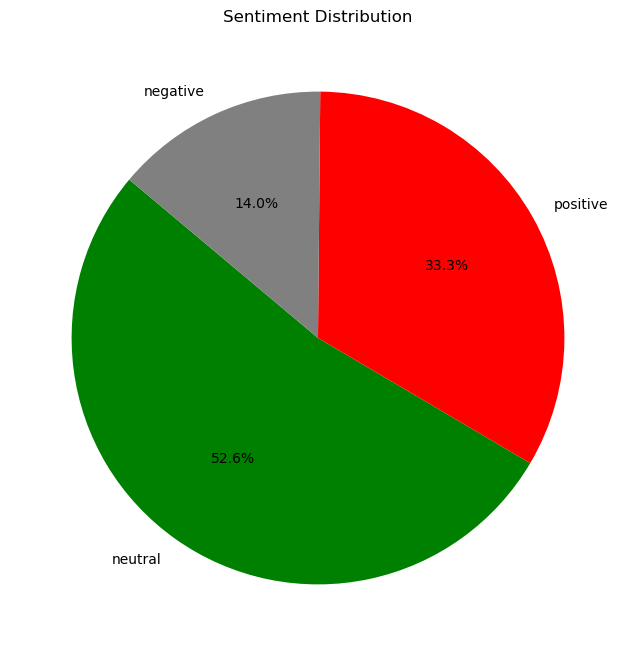

In [49]:
import matplotlib.pyplot as plt

# Assuming combined_df is your DataFrame with a 'Sentiment_Class' column
sentiment_counts = sentiment_analysis_df['Sentiment_Class'].value_counts()

# Plotting a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=['green', 'red', 'gray'])
plt.title('Sentiment Distribution')
plt.show()


### 6.1. Word Cloud  <a class="anchor" id="Bullet6.1"></a>

In the next step we generate a word cloud visualization based on the textual content extracted from the DataFrame sentiment_analysis_df. Following are the steps taken:

- Tokenization: The textual content is tokenized, meaning it's split into individual words or tokens. This step is essential as it breaks down the text into its fundamental units, allowing for further analysis at the word level.

- Stopword Removal: Stop words, such as "the", "is", "and", etc., which occur frequently in the English language and don't carry much meaningful information, are removed from the tokenized words. This helps focus the word cloud on the most relevant and informative terms.

- Word Frequency Calculation: The frequency of each remaining word is calculated to determine how often each word appears in the text corpus. This frequency information is crucial for generating the word cloud, as words that appear more frequently will be displayed more prominently in the visualization.

- Word Cloud Generation: Using the WordCloud library, a visual representation of the word frequencies is created. In the word cloud, words are displayed in varying sizes based on their frequency of occurrence in the text. The more frequently a word appears, the larger and bolder it appears in the word cloud.

- Visualization: The word cloud is displayed as a graphical representation, typically in the form of a cloud-shaped image, where the size of each word corresponds to its frequency in the text. This visualization allows for quick and intuitive identification of the most common and significant terms within the text corpus.

The importance of generating a word cloud lies in its ability to provide a concise and visually appealing summary of the textual content. Here's why word clouds are valuable:

- Identifying Key Themes: Word clouds help identify the most prominent themes, topics, or keywords present in the text corpus. By visually highlighting the most frequent terms, users can quickly grasp the main subjects or discussions within the content.

- Visualizing Data Patterns: Word clouds make it easy to visualize patterns and trends within the text data. Commonly occurring terms are displayed prominently, allowing users to identify patterns of language usage or topics of interest.

- Communicating Insights: Word clouds serve as effective communication tools for conveying insights and findings from text analysis. They provide a visually engaging way to present key information and highlight important terms, making it easier for stakeholders to understand and interpret the data.

- Facilitating Decision Making: Word clouds can aid decision-making processes by providing a snapshot of the most relevant information within the text corpus. Decision-makers can quickly identify important terms or trends and use this information to inform their decisions.

Overall, generating a word cloud from text data is a valuable technique for summarizing, visualizing, and communicating key insights and patterns within the textual content. It provides a quick and accessible way to gain meaningful insights from large volumes of text data.

In [50]:
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download('stopwords')


[nltk_data] Downloading package stopwords to C:\Users\Aayush
[nltk_data]     Ladda\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

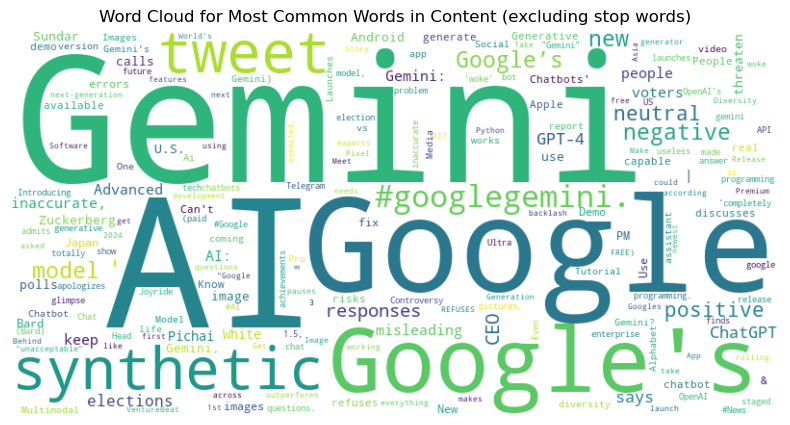

In [51]:
from wordcloud import WordCloud
from nltk.corpus import stopwords
from collections import Counter

# Assuming combined_df is your DataFrame with 'Content' column
# Check if there is content before proceeding
if not sentiment_analysis_df['Content'].empty:
    # Tokenize the words in the content
    words = ' '.join(sentiment_analysis_df['Content']).split()

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word.lower() not in stop_words]

    # Create a WordCloud object
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(Counter(words))

    # Display the WordCloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud for Most Common Words in Content (excluding stop words)')
    plt.show()
else:
    print("No content available to create a Word Cloud.")


### 6.2. Exporting the data as a parquet file  <a class="anchor" id="Bullet6.2"></a>

Exporting the sentiment analysis data into a Parquet file is the final step in the data processing pipeline. Parquet is a columnar storage format optimized for analytics and designed to efficiently store and process large volumes of data. 

- Data Export: After performing sentiment analysis and generating insights from the data, the next step is to export the processed data into a Parquet file format. This file will contain the sentiment analysis results, including the original text content and the assigned sentiment class (Positive, Negative, or Neutral) for each entry.

- Efficient Storage: Parquet files are highly efficient for storing structured data, especially when dealing with large datasets. They use a columnar storage format, which stores data column by column rather than row by row. This organization enables efficient compression and encoding techniques, resulting in reduced storage space and improved query performance.

- Optimized for Analytics: Parquet files are designed for analytical workloads, making them ideal for data analysis and processing tasks. They support advanced features such as predicate pushdown and column pruning, which optimize query execution by minimizing data scanned and processed during analytics queries.

- Compatibility with Big Data Ecosystem: Parquet files are widely supported by various data processing frameworks and platforms, including Apache Spark, Apache Hive, and Apache Impala. They can be seamlessly integrated into existing data pipelines and workflows, allowing for easy interoperability and data exchange between different systems.

- Preservation of Data Types and Schema: Parquet files preserve the data types and schema of the original dataset, ensuring data integrity and consistency across different stages of the data processing pipeline. This makes it easier to maintain data quality and ensure compatibility with downstream analysis and visualization tools.

- Scalability and Performance: Parquet files are highly scalable and performant, capable of handling large volumes of data with high throughput and low latency. They are well-suited for distributed computing environments and parallel processing frameworks, making them an excellent choice for big data analytics and processing tasks.

- Ease of Use: Exporting data into Parquet files is straightforward and can be easily accomplished using libraries and tools available in programming languages such as Python and Java. Many data processing frameworks also provide built-in support for reading and writing Parquet files, simplifying the integration of Parquet-based data storage into data pipelines.

In summary, exporting sentiment analysis data into a Parquet file provides a scalable, efficient, and optimized solution for storing and processing structured data. Parquet files are well-suited for analytical workloads and are compatible with a wide range of data processing frameworks and platforms, making them a valuable asset in modern data processing pipelines.

In [52]:
# Check data
sentiment_analysis_df.head()

Content  Sentiment  \
0  Maria Skłodowska-Curie according to Google's G...       0.00   
1  Google Gemini AI-image generator refuses to ge...      -0.25   
2                               I use GoogleGeminiAI       0.00   
3  [D] Is Google Gemini the real deal or a public...       0.20   
4                 outjerked by woke google gemini ai       0.00   

  Sentiment_Class  
0         neutral  
1        negative  
2         neutral  
3        positive  
4         neutral

In [53]:
import pyarrow as pa
import pyarrow.parquet as pq

# Convert to csv
sentiment_analysis_df.to_csv('sentiment_analysis.csv', index=False)

# Convert DataFrame to Parquet
def convert_df_to_parquet(df, file_path):
    table = pa.Table.from_pandas(df)
    pq.write_table(table, file_path)

# Convert to parquet
convert_df_to_parquet(sentiment_analysis_df, 'sentiment_analysis.parquet')

# 7. Appendix <a class="anchor" id="Bullet7"></a>

Project Flow and Minutes-of-meeting:

Kick-off Session (19/02/2024):
- The project commenced with a kick-off session aimed at establishing the project plan, with a particular focus on Sentiment Analysis.
- During this session, the team collectively decided on the overarching strategy and objectives.
- It was agreed that regular weekly meetings would be held every Wednesday to monitor progress and address any challenges.

First Follow-up Meeting (21/02/2024):
- The team convened to outline the technical steps required for project implementation.
- The decision was made to divide the tasks, with the extraction segment to be performed in the cloud and the transformation aspect to be handled locally via GitHub.
- Resource allocation was discussed and finalized, with Zuzanna and Aayush assigned responsibilities concerning AWS, while Punpun and Ankit undertook tasks related to GitHub setup.

Second Meeting (28/02/2024):
- Detailed planning ensued, focusing on the establishment of essential files in the cloud infrastructure.
- Specific tasks included configuring manual upload mechanisms, implementing an API to fetch news articles onto EC2, and generating fake tweets due to the unavailability of a free API.
- Punpun and Ankit collaborated to set up MongoDB and SQLite on GitHub using Visual Studio.
- The draft version of the architecture diagram was prepared, outlining the structural framework of the project.

Third Meeting (04/03/2024):
- The team finalized the setup of the cloud infrastructure, ensuring seamless execution of scheduled tasks.
- APIs for fetching news articles and generating fake tweets were scheduled to execute at 5 AM, with outputs pushed to S3 via crontab at 6 AM.
- A decision was made to adopt this approach over Docker for enhanced flexibility and efficiency.
- Progress was made on the Jupyter notebook segment, focusing on transformation processes and loading parquet files for sentiment analysis.

Final Meeting (08/03/2024):
- The team convened for the project's concluding meeting, conducting a comprehensive review of all documentation and the GitHub repository.
- Attention was directed towards ensuring the completeness and accuracy of all project-related materials in preparation for closure.

Attendance and Collaboration:
- Throughout the project lifecycle, the team exhibited 100% attendance, with all members actively participating in meetings. Members who were feeling unwell participated through Teams, ensuring continuous collaboration and communication during the project.




